# Proyecto 1 - Mineria de datos
## Explorando patrones de robos por edad de las victimas en Guatemala

### Autores:
#### Andrés de la Roca
#### Jun Woo Lee

### Analisis exploratorio

In [342]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

from sklearn.cluster import *
from kneed import KneeLocator


#### Importar la data

In [343]:
# Importacion de csv a dataframe
data2012 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2012.csv')
data2013 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2013.csv')
data2014 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2014.csv')
data2015 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2015.csv')
data2016 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2016.csv')
data2017 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2017.csv')
data2018 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2018.csv')
data2019 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2019.csv')
data2020 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2020.csv')
data2021 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2021.csv')

# Concatenacion de los dataframes en uno general
datageneral = pd.concat([data2012, data2013, data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021])


display(datageneral)

,rango_edad,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses
0,<15,1,-,-,33,1,-,-
1,15-19,83,277,30,279,16,17,6
2,20-24,624,1212,119,373,102,88,9
3,25-29,883,1042,234,308,152,103,27
4,30-34,1102,782,329,256,183,142,18
...,...,...,...,...,...,...,...,...
6,40-44,93,95,40,52,30,38,1
7,45-49,65,60,33,29,28,20,-
8,50-54,44,30,17,12,23,19,-
9,55-59,34,24,5,12,14,15,-


#### Limpieza de variables

<AxesSubplot: >

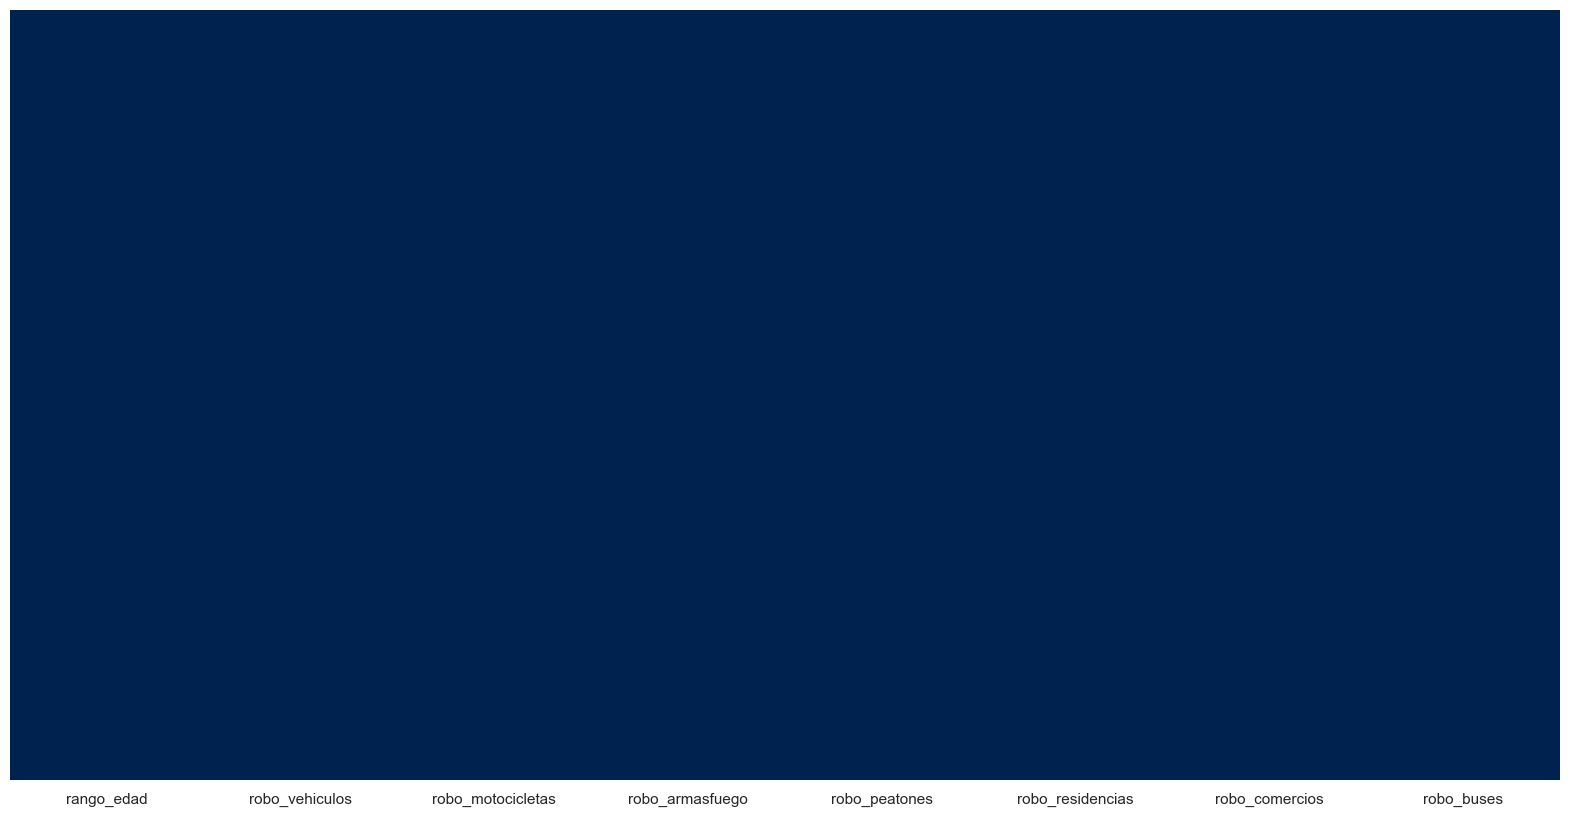

In [344]:
# Chequear por valores nulos
sns.heatmap(datageneral.isnull(), yticklabels=False, cbar=False, cmap='cividis')

In [345]:
# Cambiar valores "-" por 0
for column in datageneral:
    datageneral[column] = datageneral[column].replace('-', 0)
    if column != 'rango_edad':
        datageneral[column] = datageneral[column].astype(int)

In [346]:
# Cambiar los tipos de las columnas a los correctos
datageneral = clean(datageneral, method='dtypes', columns=['robo_vehiculos', 'robo_motocicletas', 'robo_armasfuego', 'robo_residencias', 'robo_comercios', 'robo_buses'], dtype='int')

In [347]:
# Chequear los tipos de cada columna
datageneral.dtypes

rango_edad           object
robo_vehiculos        int32
robo_motocicletas     int32
robo_armasfuego       int32
robo_peatones         int32
robo_residencias      int32
robo_comercios        int32
robo_buses            int32
dtype: object

In [348]:
display(datageneral)

,rango_edad,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses
0,<15,1,0,0,33,1,0,0
1,15-19,83,277,30,279,16,17,6
2,20-24,624,1212,119,373,102,88,9
3,25-29,883,1042,234,308,152,103,27
4,30-34,1102,782,329,256,183,142,18
...,...,...,...,...,...,...,...,...
6,40-44,93,95,40,52,30,38,1
7,45-49,65,60,33,29,28,20,0
8,50-54,44,30,17,12,23,19,0
9,55-59,34,24,5,12,14,15,0


#### Resumen de la data

In [349]:
# Resumen de la data
explore(datageneral, method='summarize')

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:27: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:28: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:29: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
rango_edad,object,110,0,0.0,11,15-19,-,-,-,>60,-,-,-,-
robo_armasfuego,int32,110,0,0.0,72,0,18.25,43.0,92.0,350,70.109091,43.0,78.513991,1.787615
robo_buses,int32,110,0,0.0,17,0,0.0,1.0,3.0,27,2.809091,1.0,4.413273,2.660691
robo_comercios,int32,110,0,0.0,66,0,14.0,32.5,57.0,142,39.818182,32.5,32.545855,0.99554
robo_motocicletas,int32,110,0,0.0,94,0,42.25,136.0,358.25,1427,265.545455,136.0,326.616225,1.987914
robo_peatones,int32,110,0,0.0,77,4,33.0,62.0,152.75,379,105.7,62.0,94.607208,1.13916
robo_residencias,int32,110,0,0.0,73,0,18.5,43.0,85.25,186,56.336364,43.0,49.255983,0.949507
robo_vehiculos,int32,110,0,0.0,81,0,34.5,79.0,166.25,1102,183.954545,79.0,250.066721,1.803242


#### Exploracion de variable numericas

Outlier Analysis - Boxplot


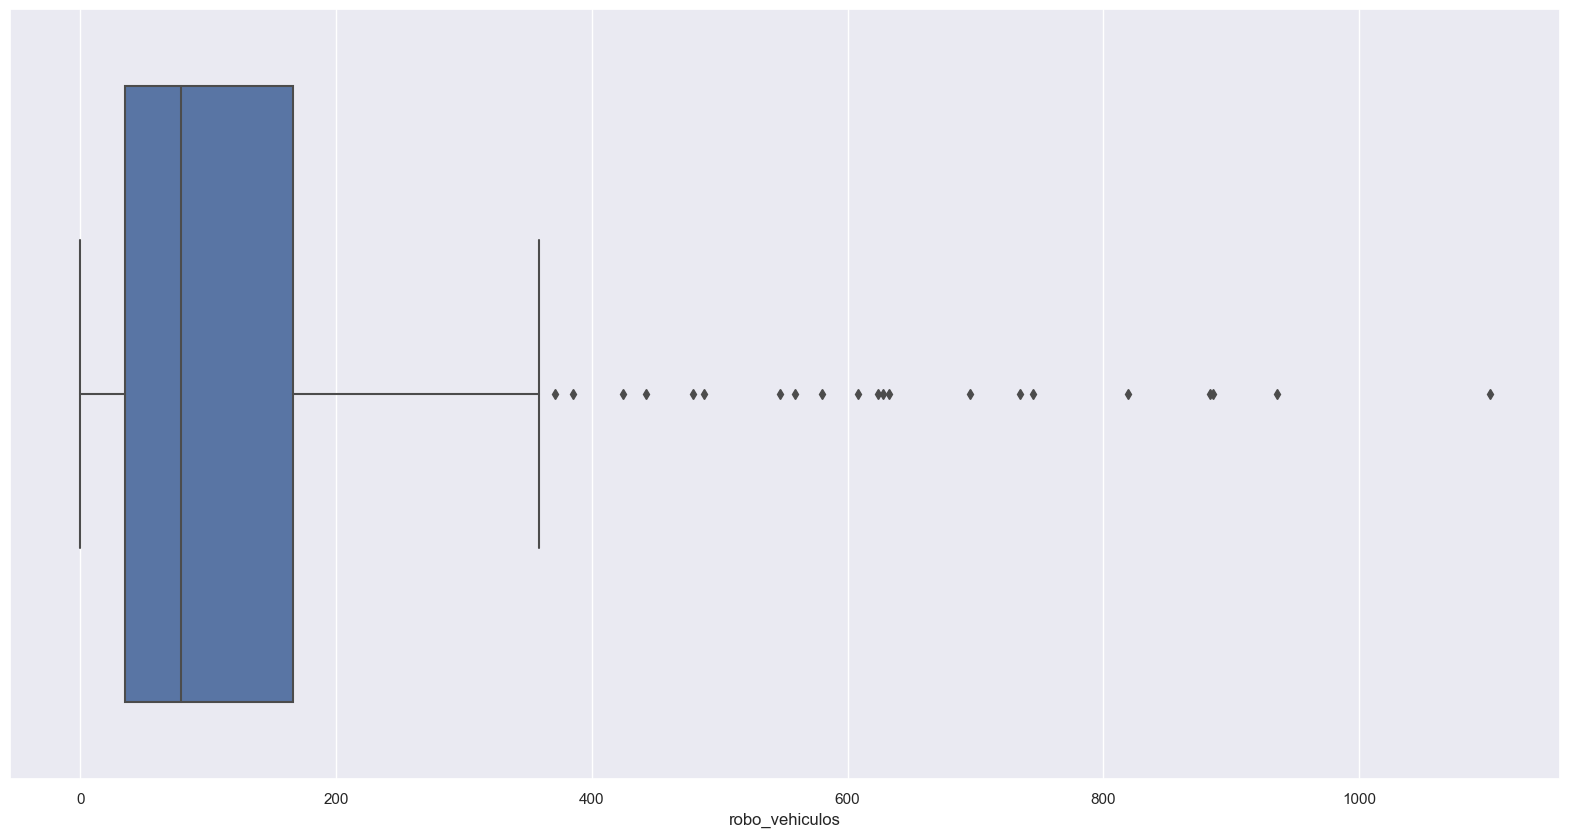

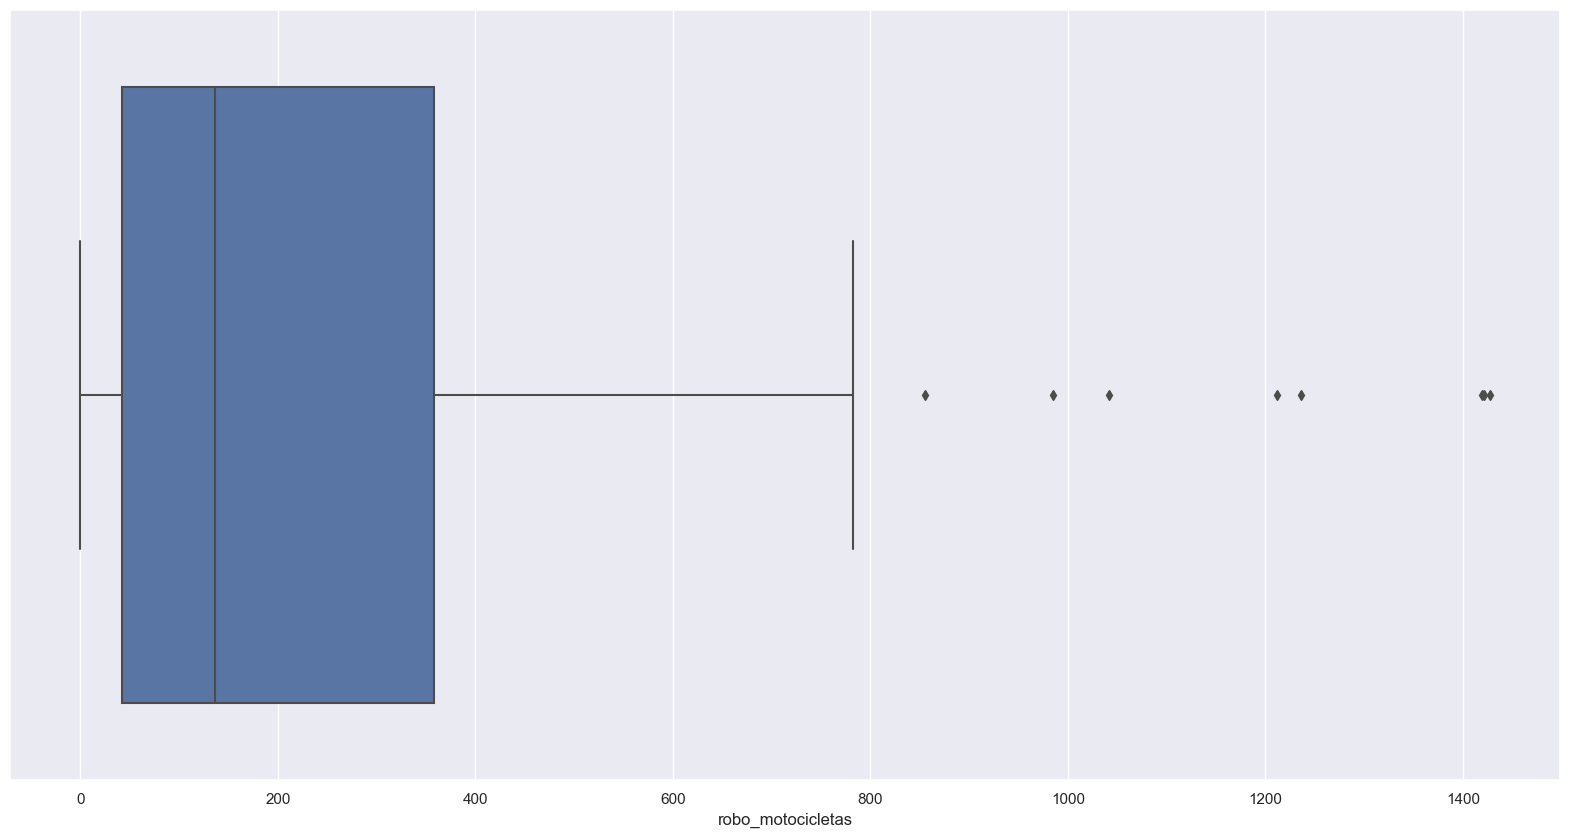

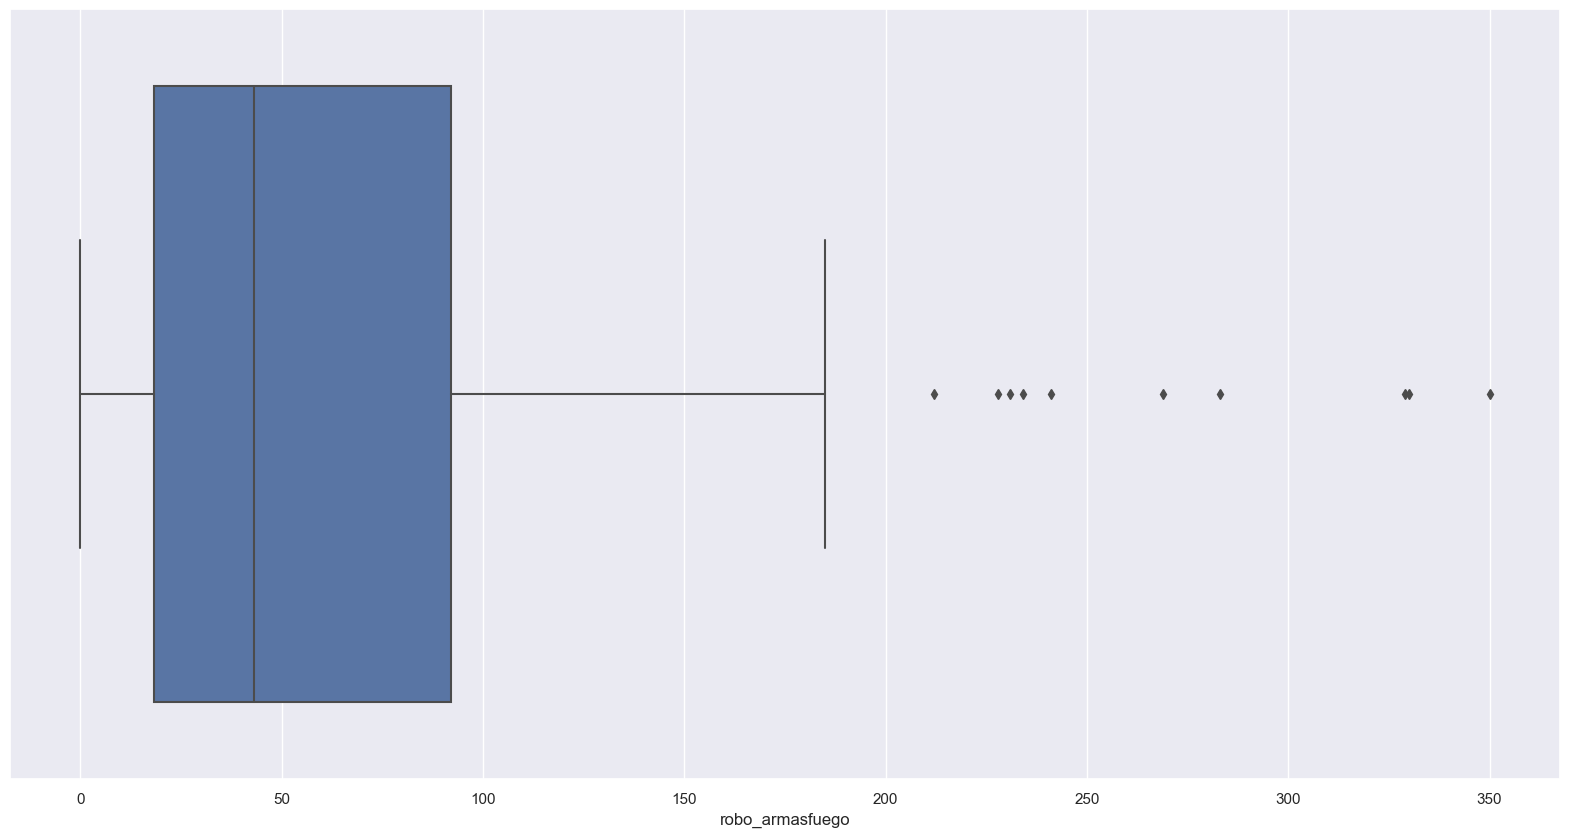

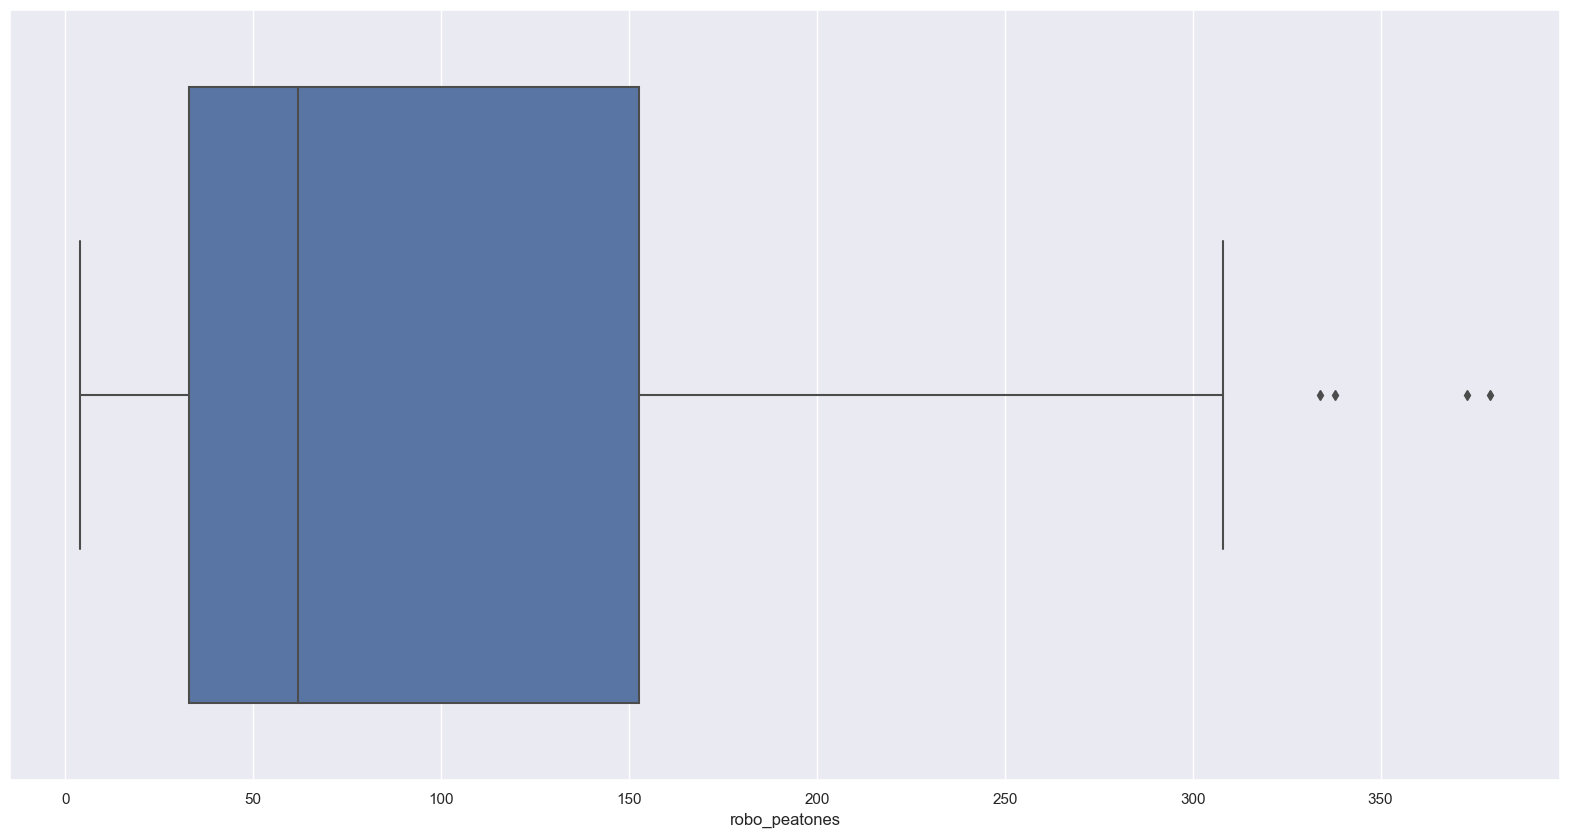

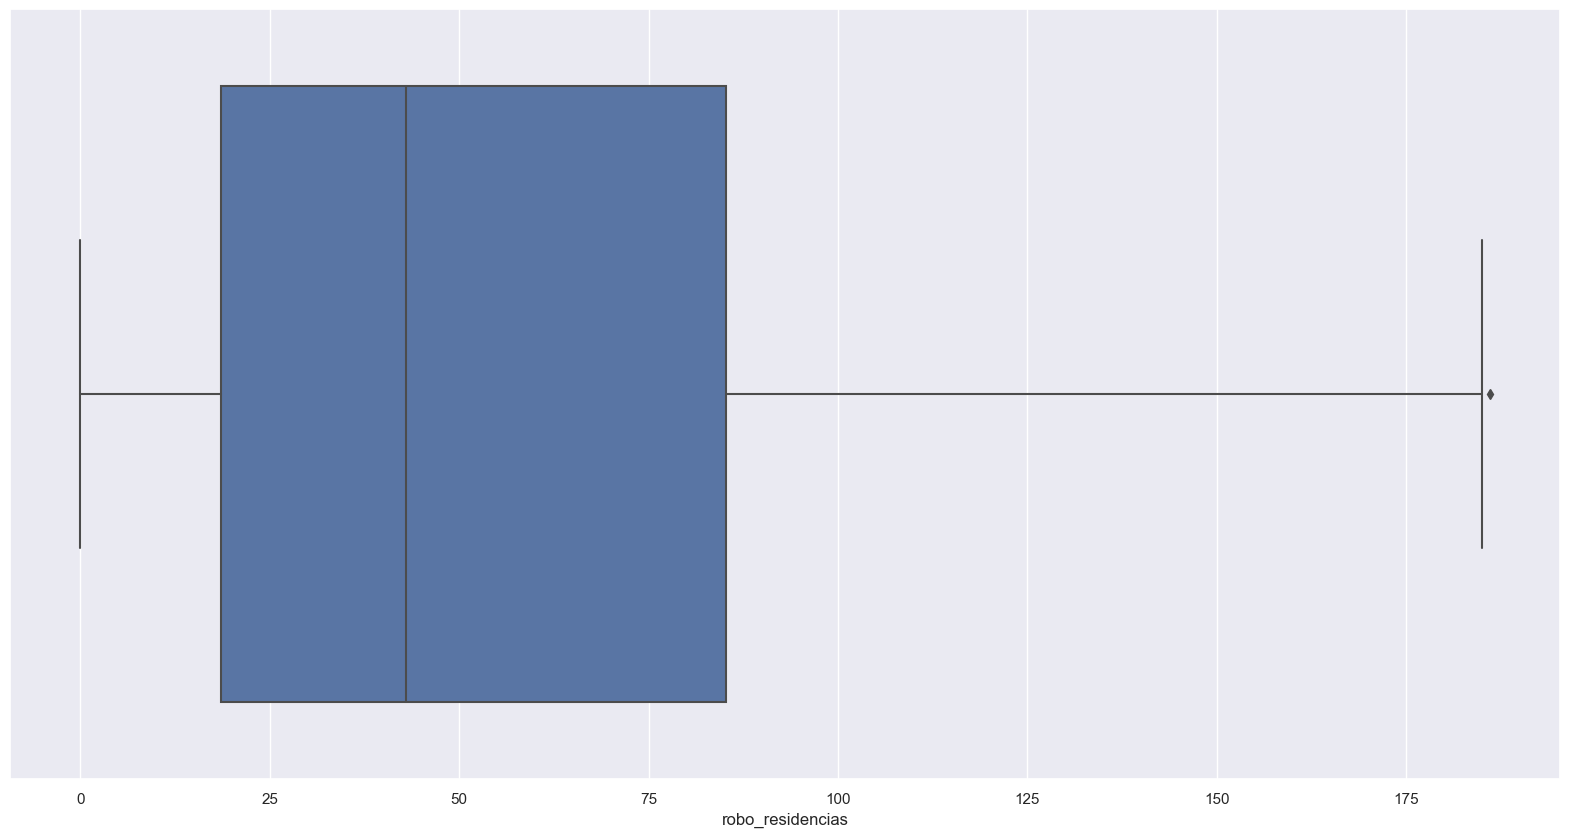

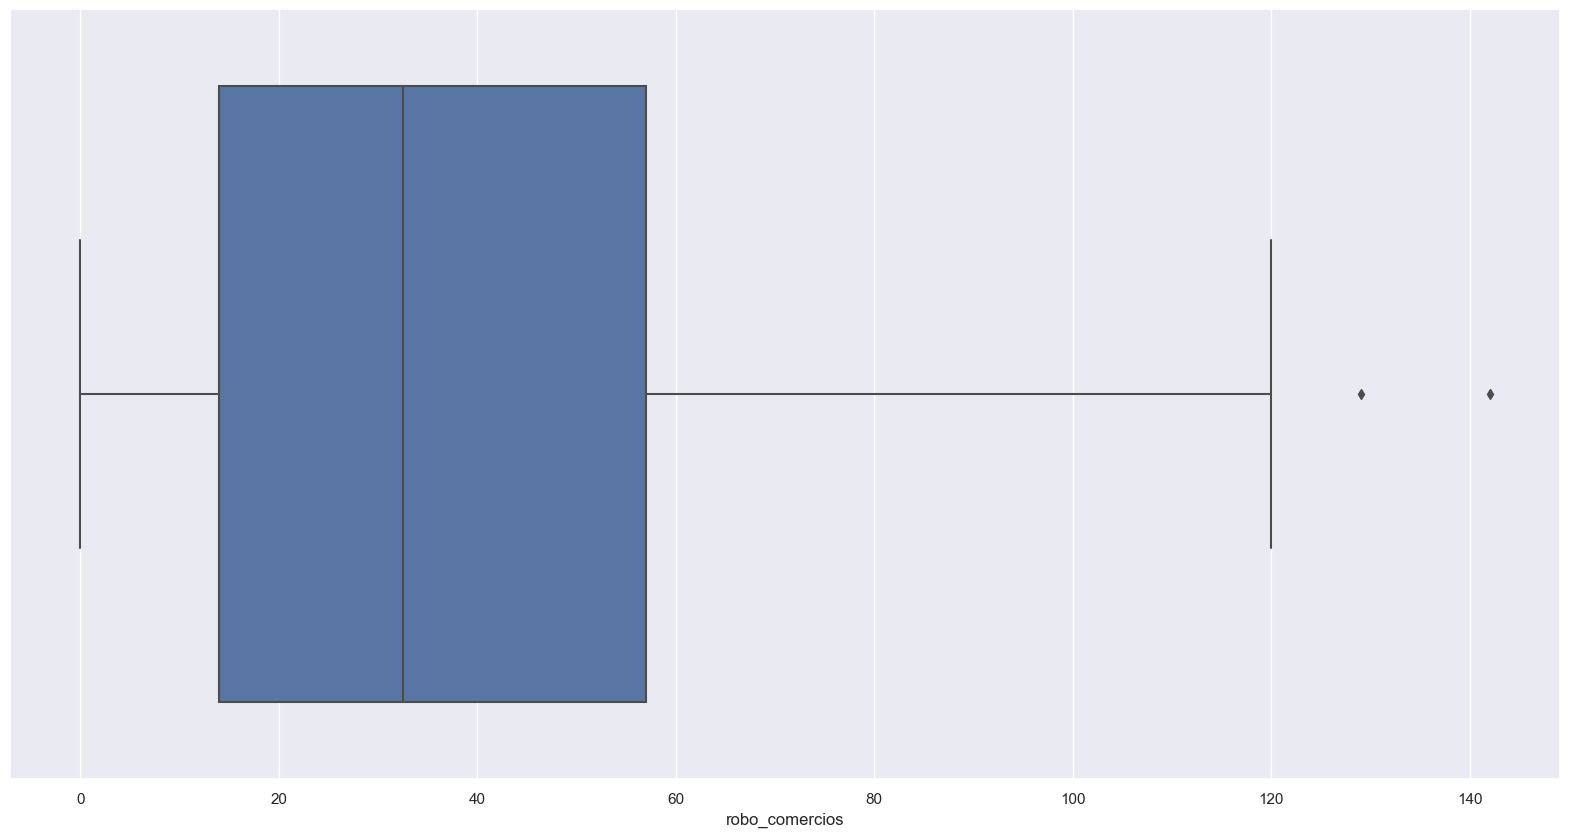

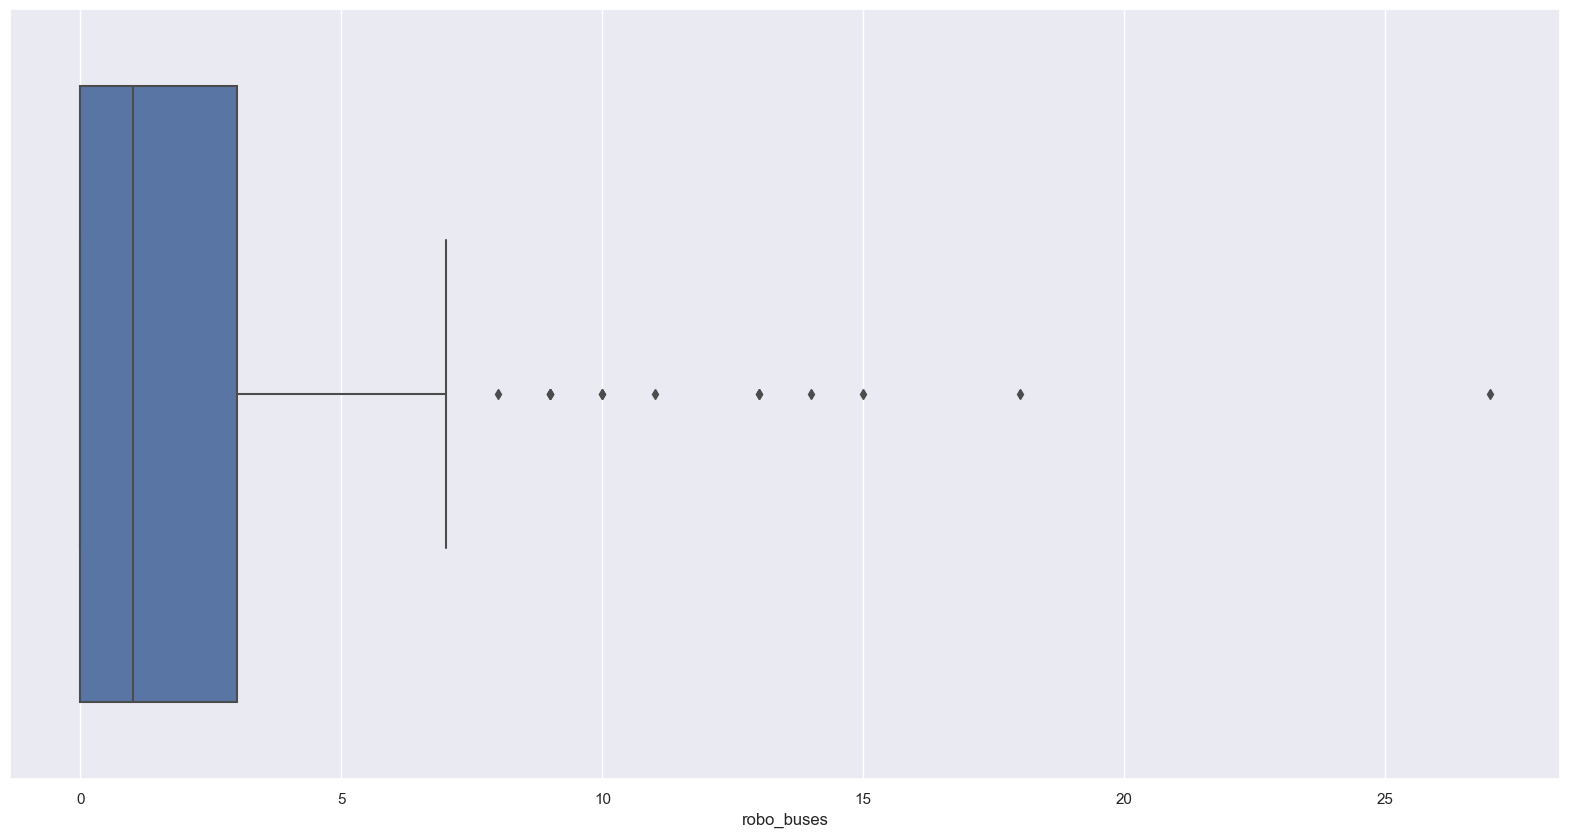

Distribution Analysis - Histogram


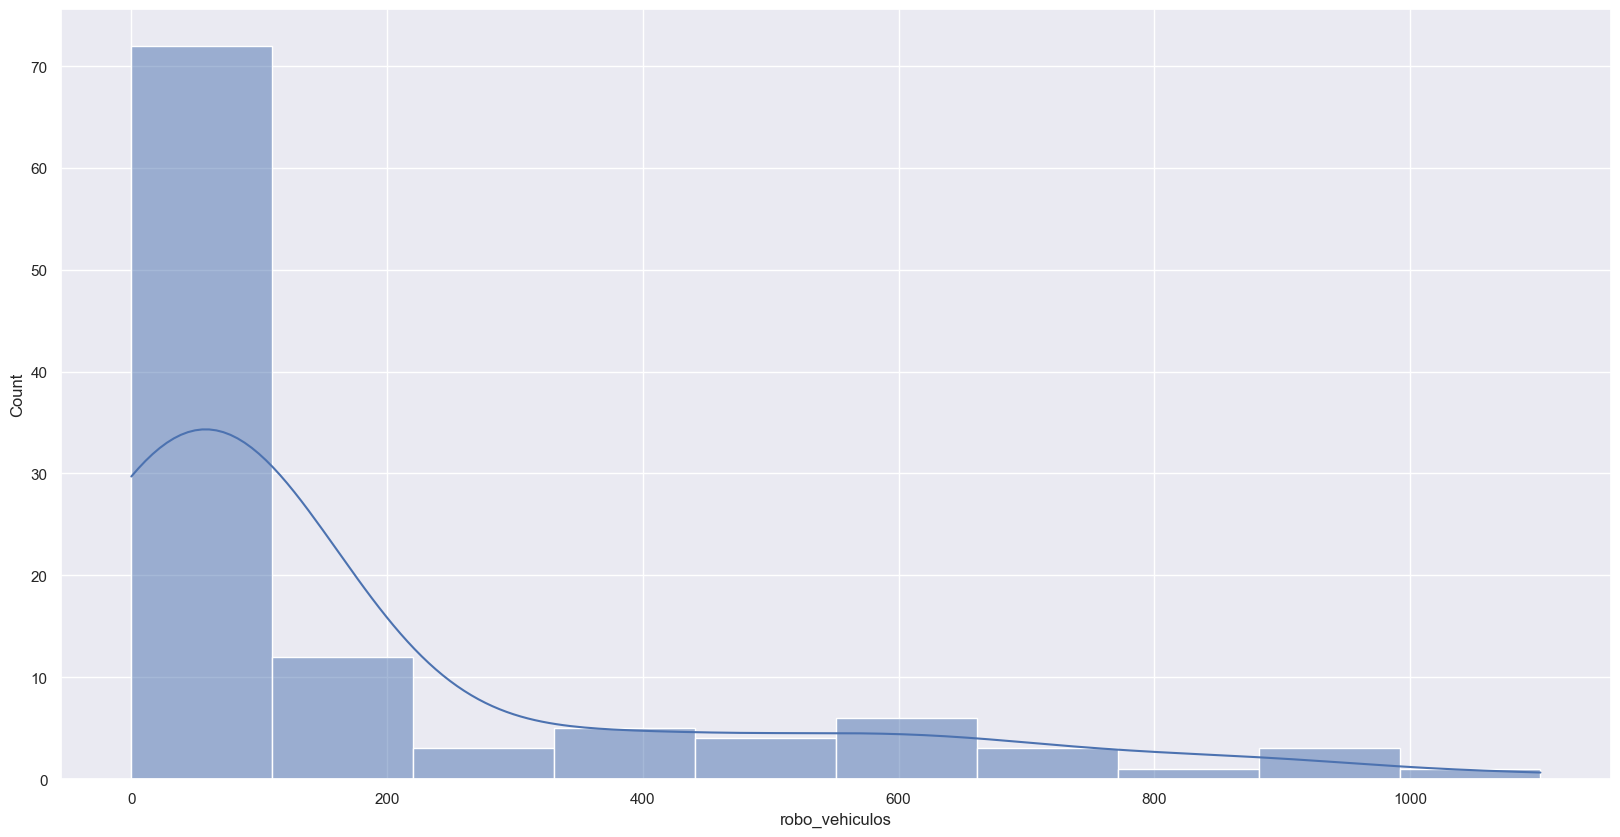

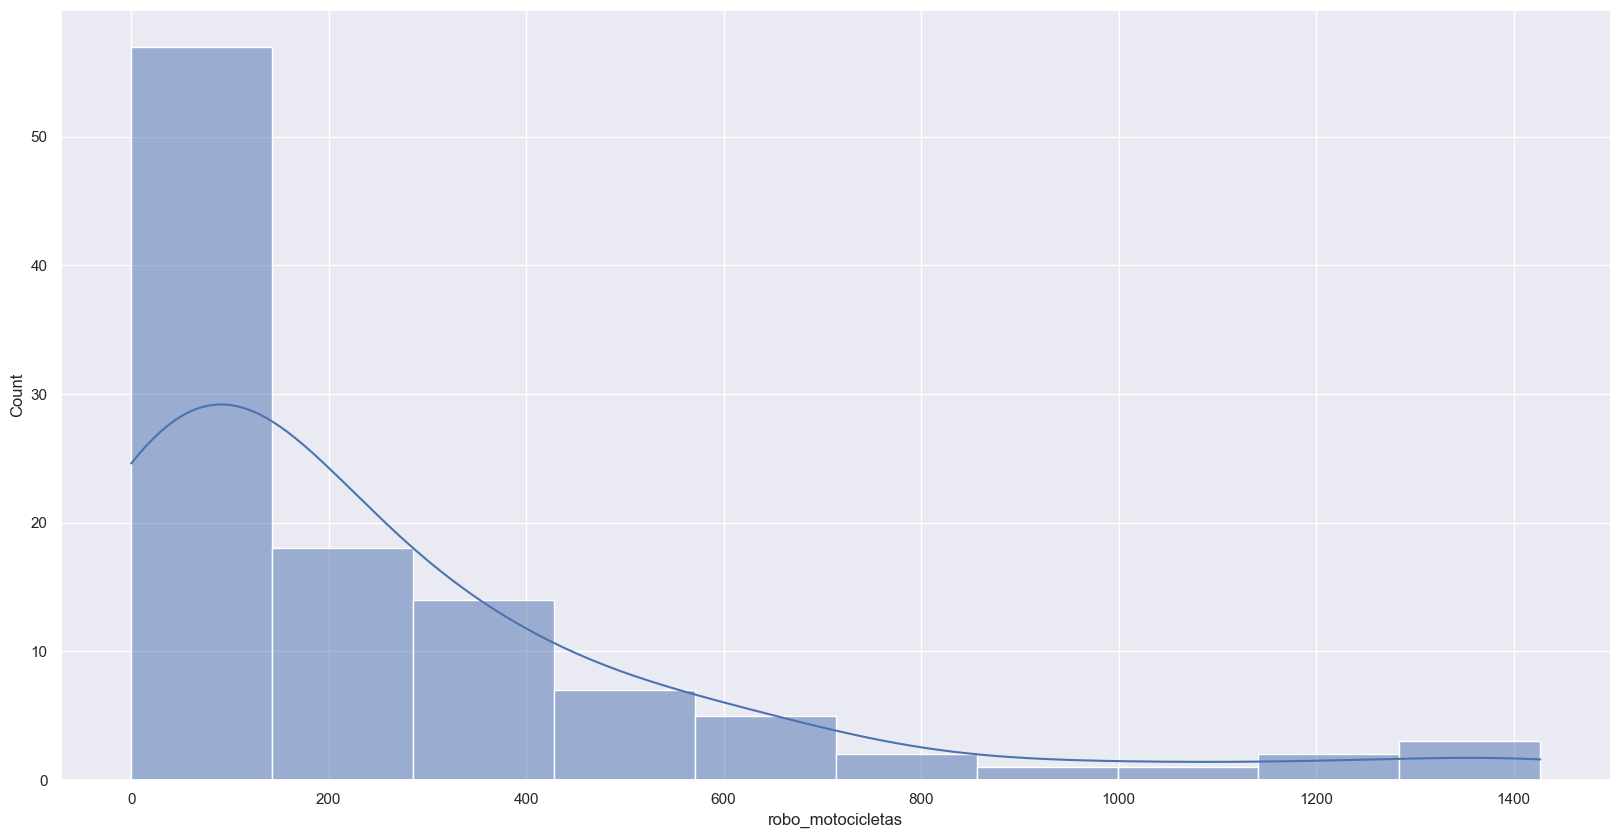

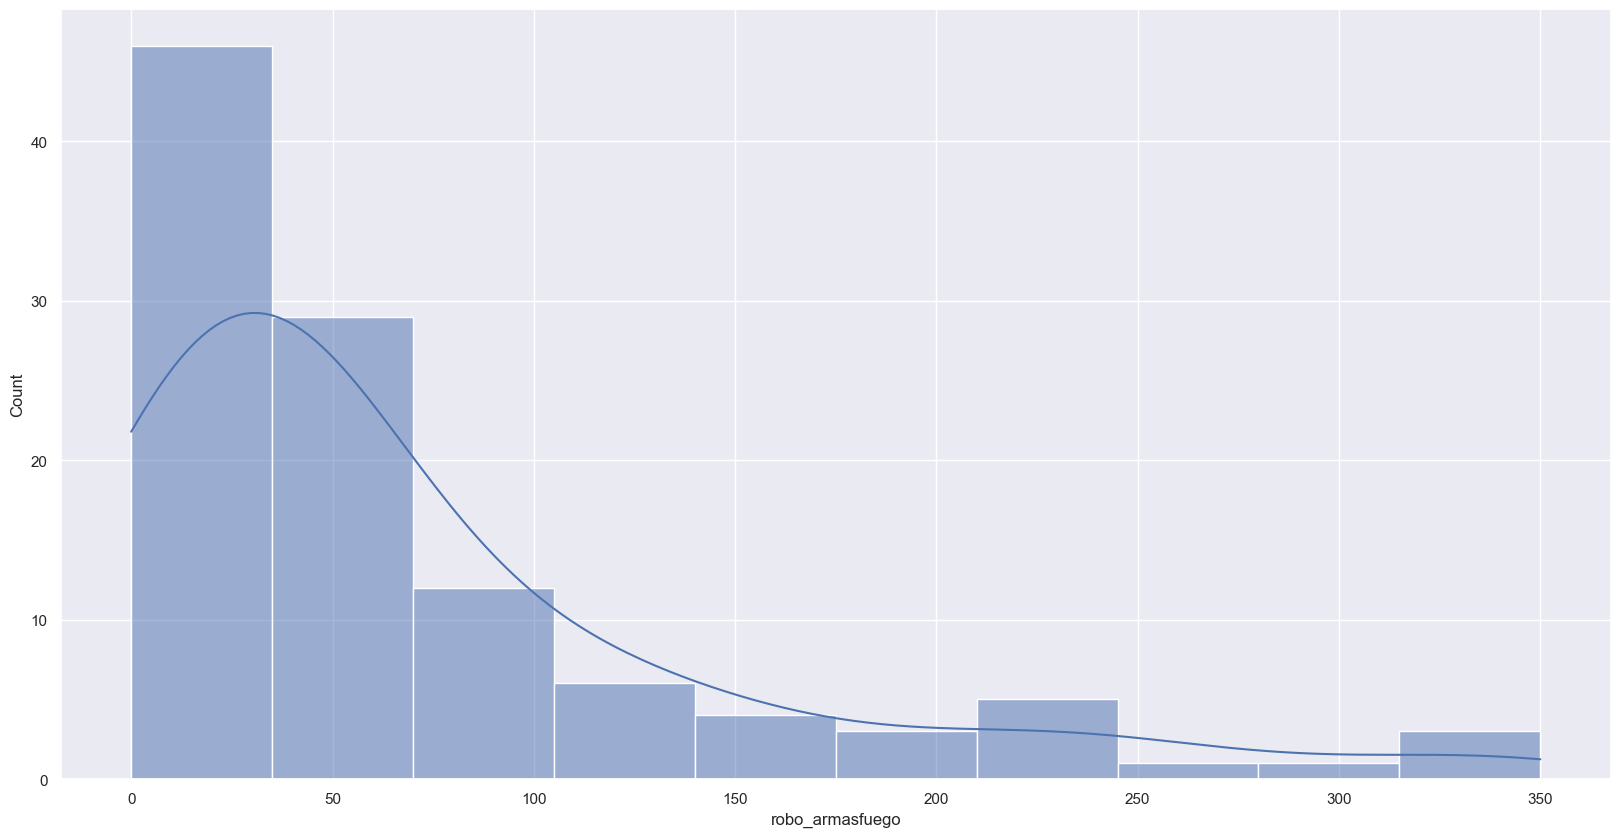

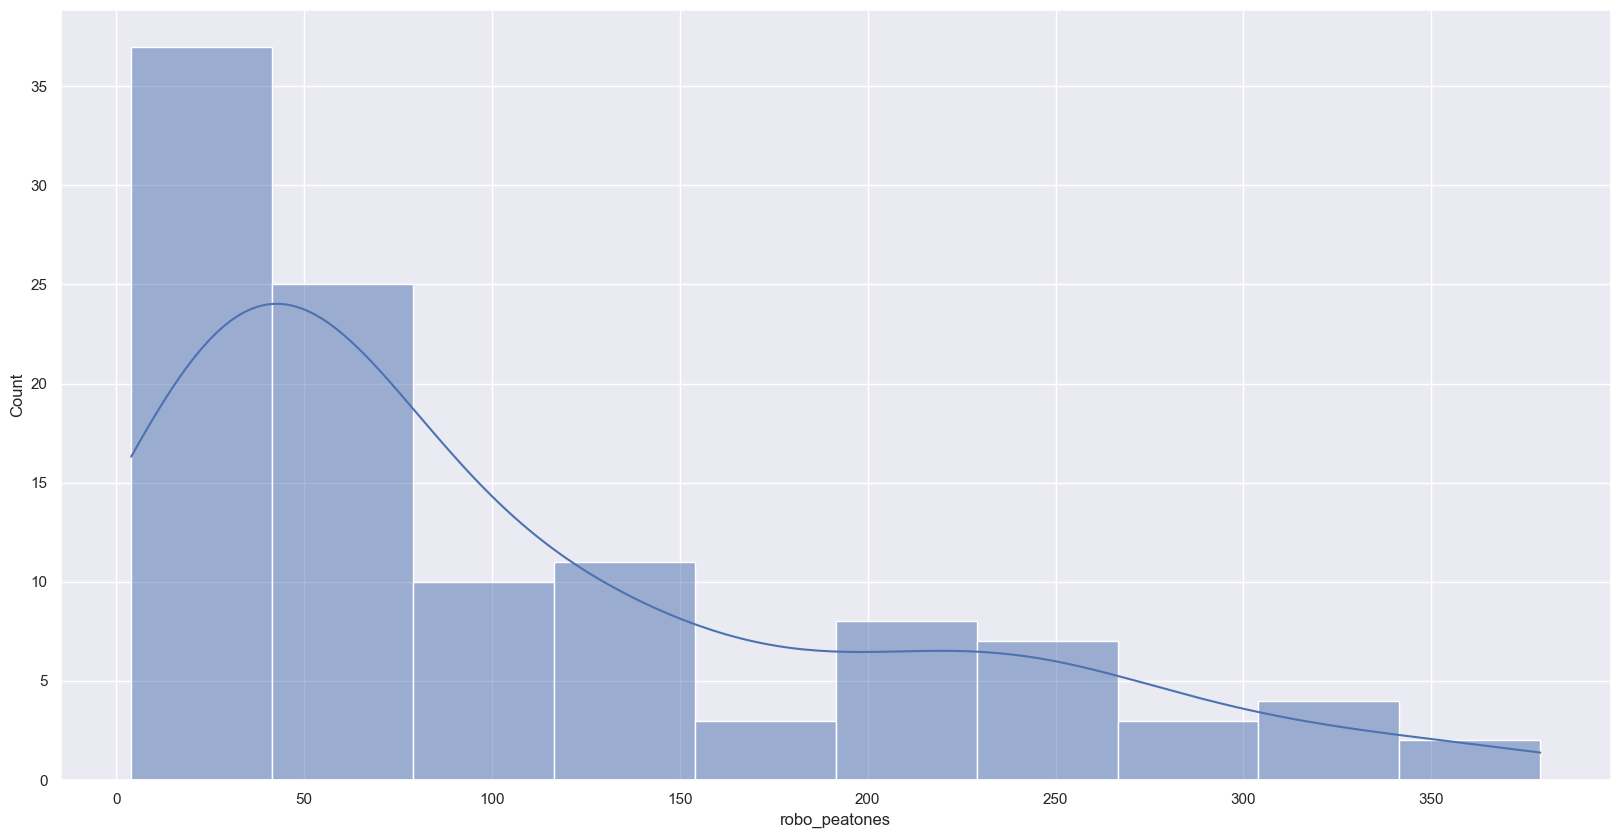

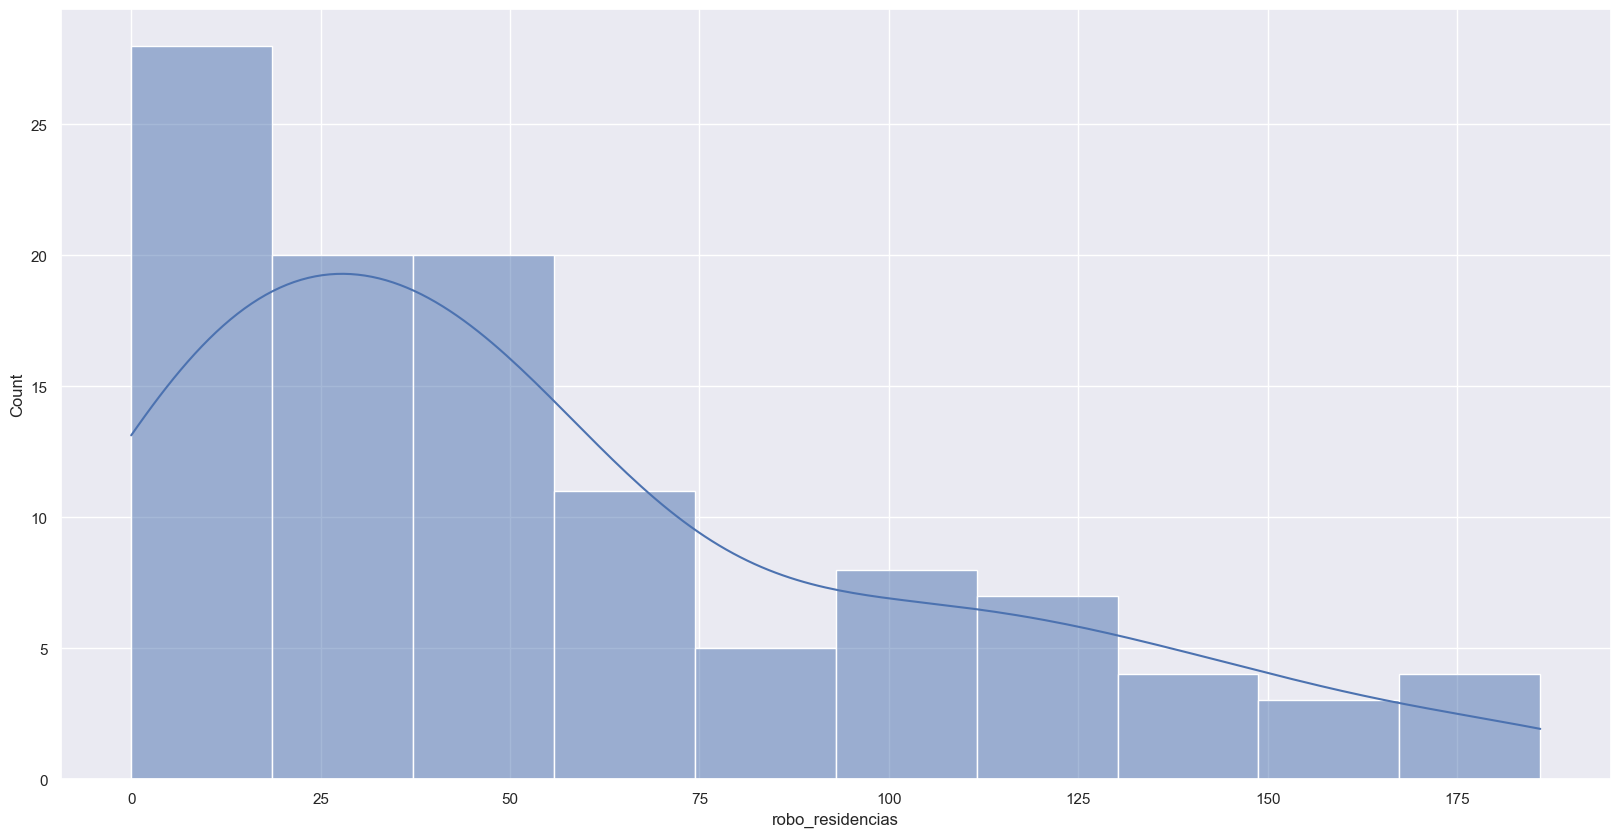

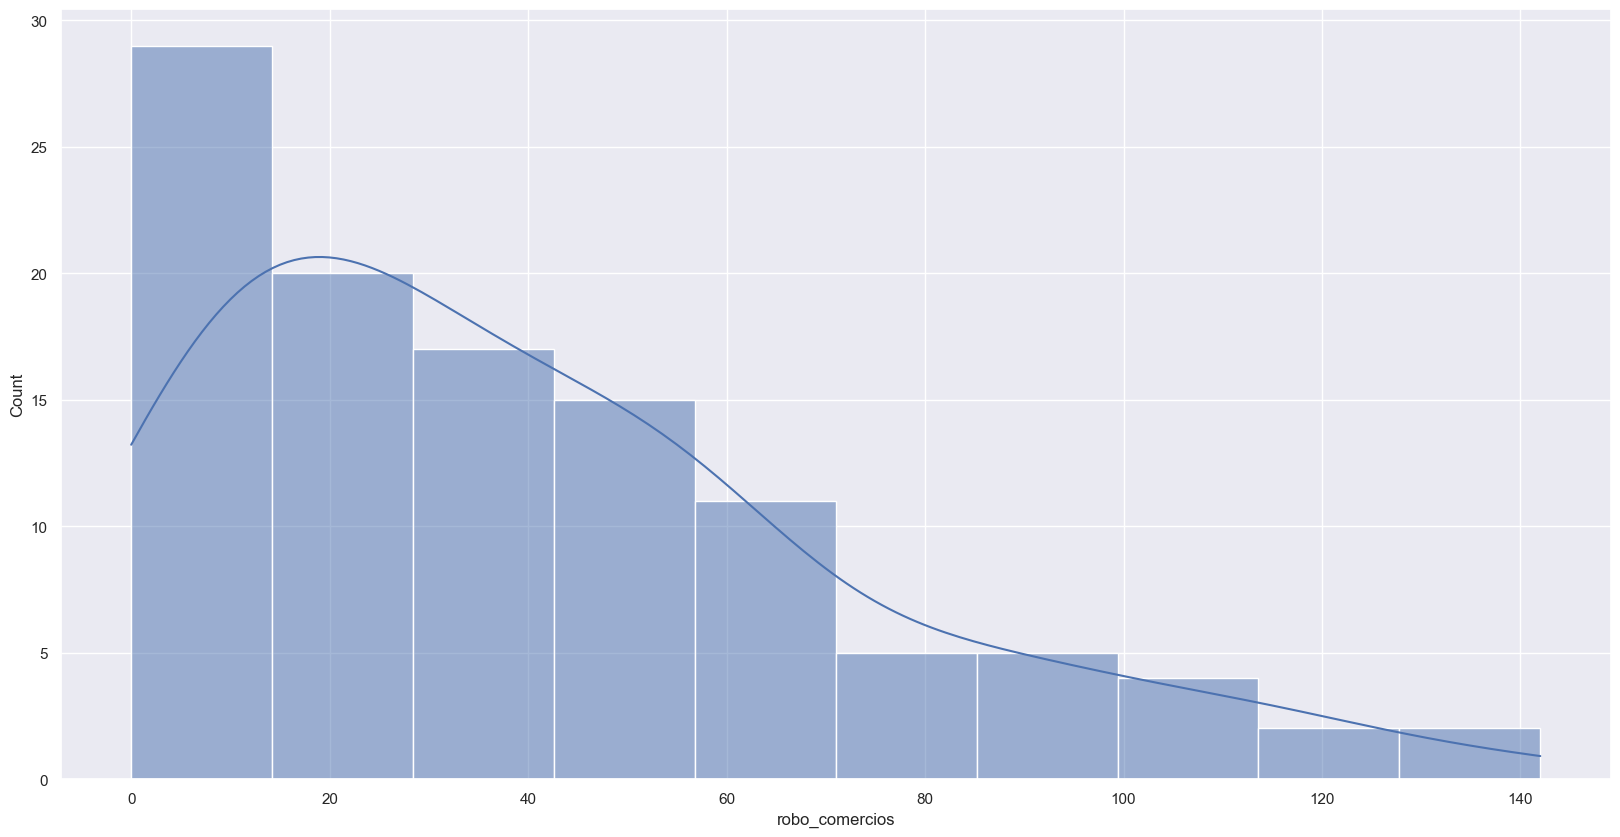

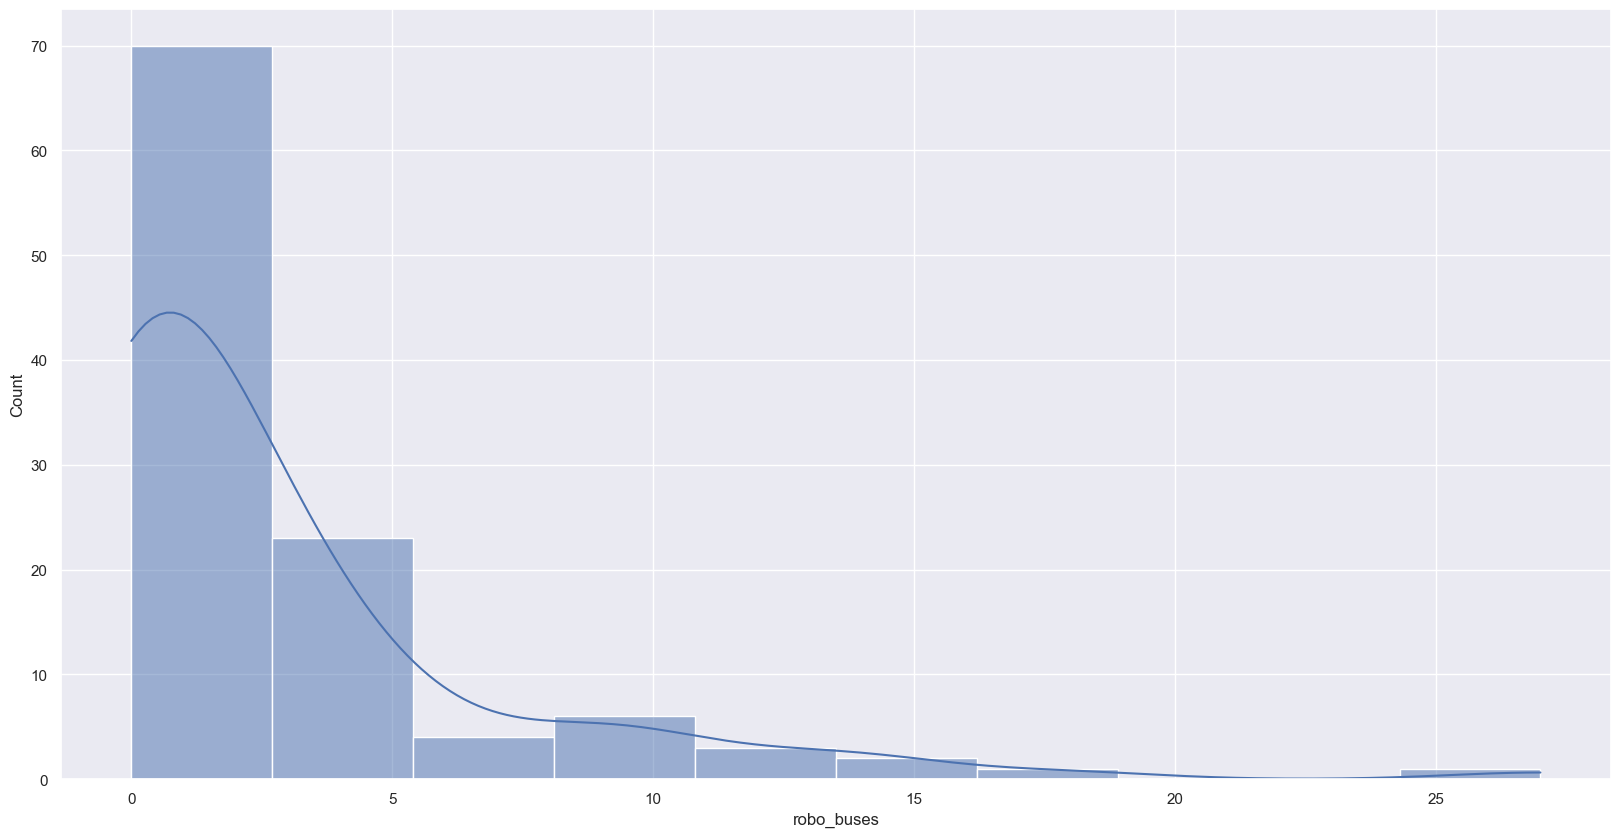

In [350]:
eda_num(datageneral)

In [351]:
eda_num(datageneral, method='correlation')

Correlation Analysis - Heatmap


c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_numeric.py:28: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses
robo_vehiculos,1.00,0.62,0.95,0.35,0.90,0.83,0.78
robo_motocicletas,0.62,1.00,0.55,0.81,0.50,0.74,0.57
robo_armasfuego,0.95,0.55,1.00,0.29,0.94,0.85,0.74
robo_peatones,0.35,0.81,0.29,1.00,0.23,0.47,0.43
robo_residencias,0.90,0.50,0.94,0.23,1.00,0.83,0.73
robo_comercios,0.83,0.74,0.85,0.47,0.83,1.00,0.71
robo_buses,0.78,0.57,0.74,0.43,0.73,0.71,1.00


#### Exploracion de variables categoricas

Feature Importance in the prediction of rango_edad


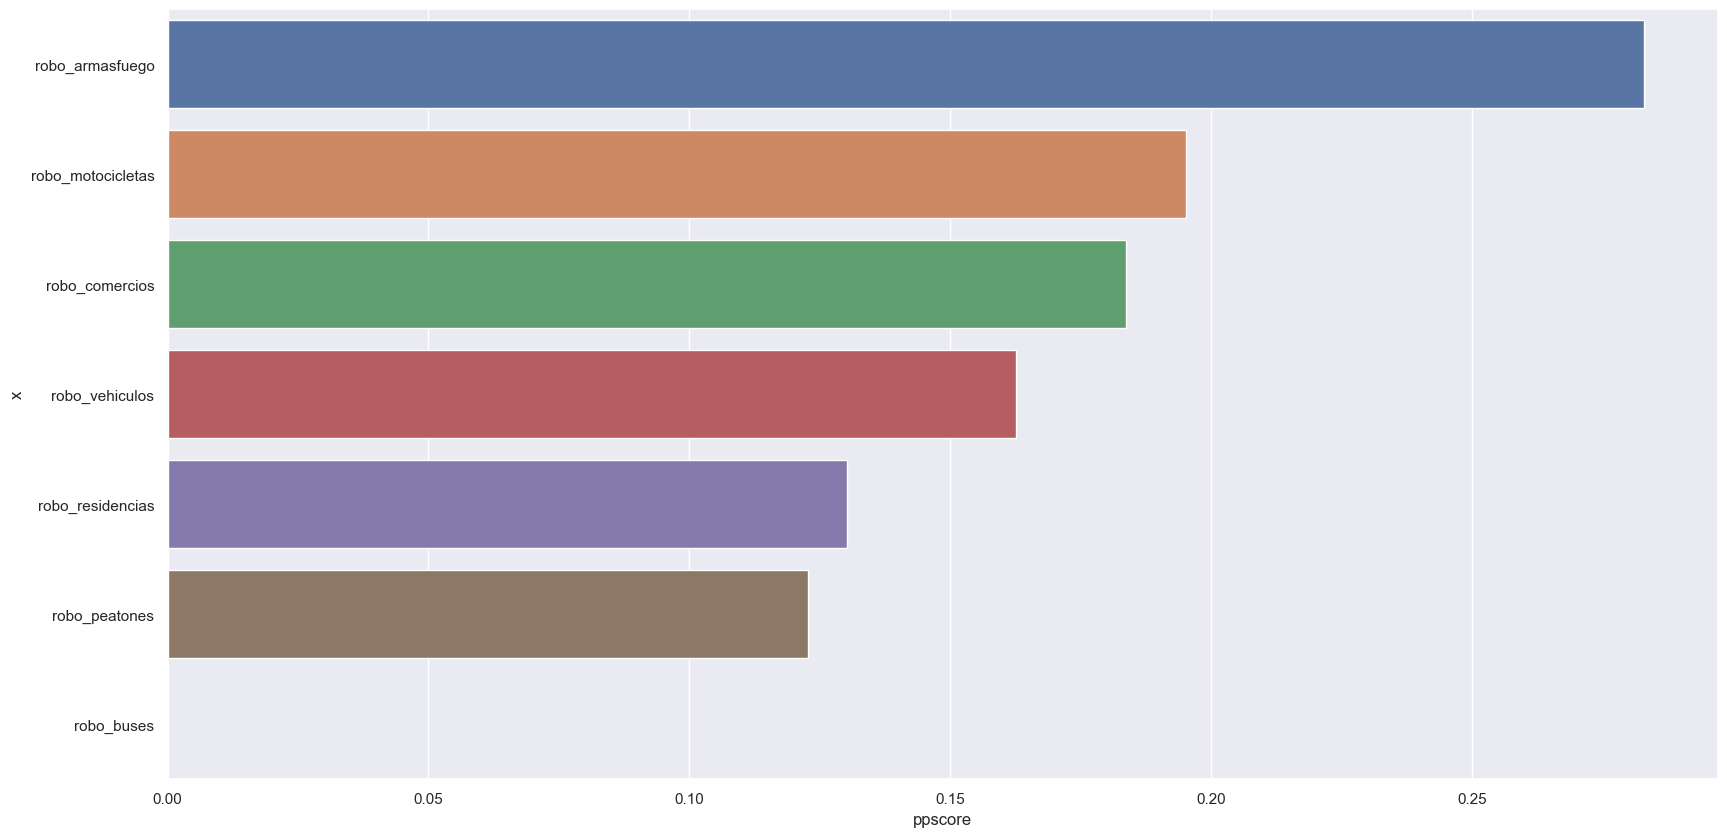

In [352]:
eda_numcat(datageneral, x='rango_edad')

#### Exploracion variables categoricas y numericas

<AxesSubplot: xlabel='rango_edad', ylabel='robo_armasfuego'>

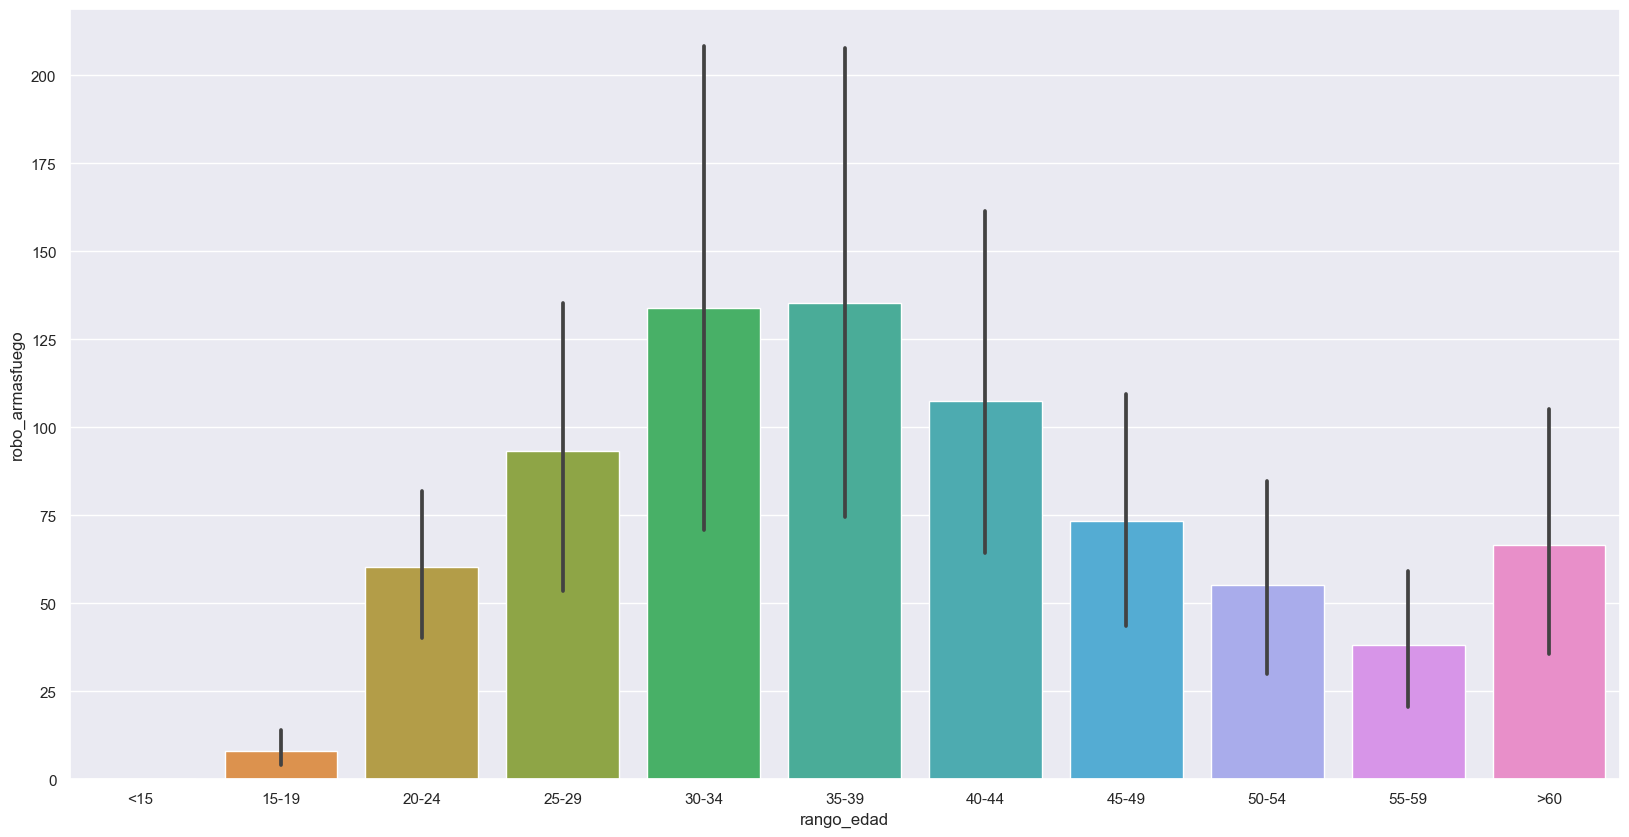

In [353]:
sns.barplot(x='rango_edad', y='robo_armasfuego', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_vehiculos'>

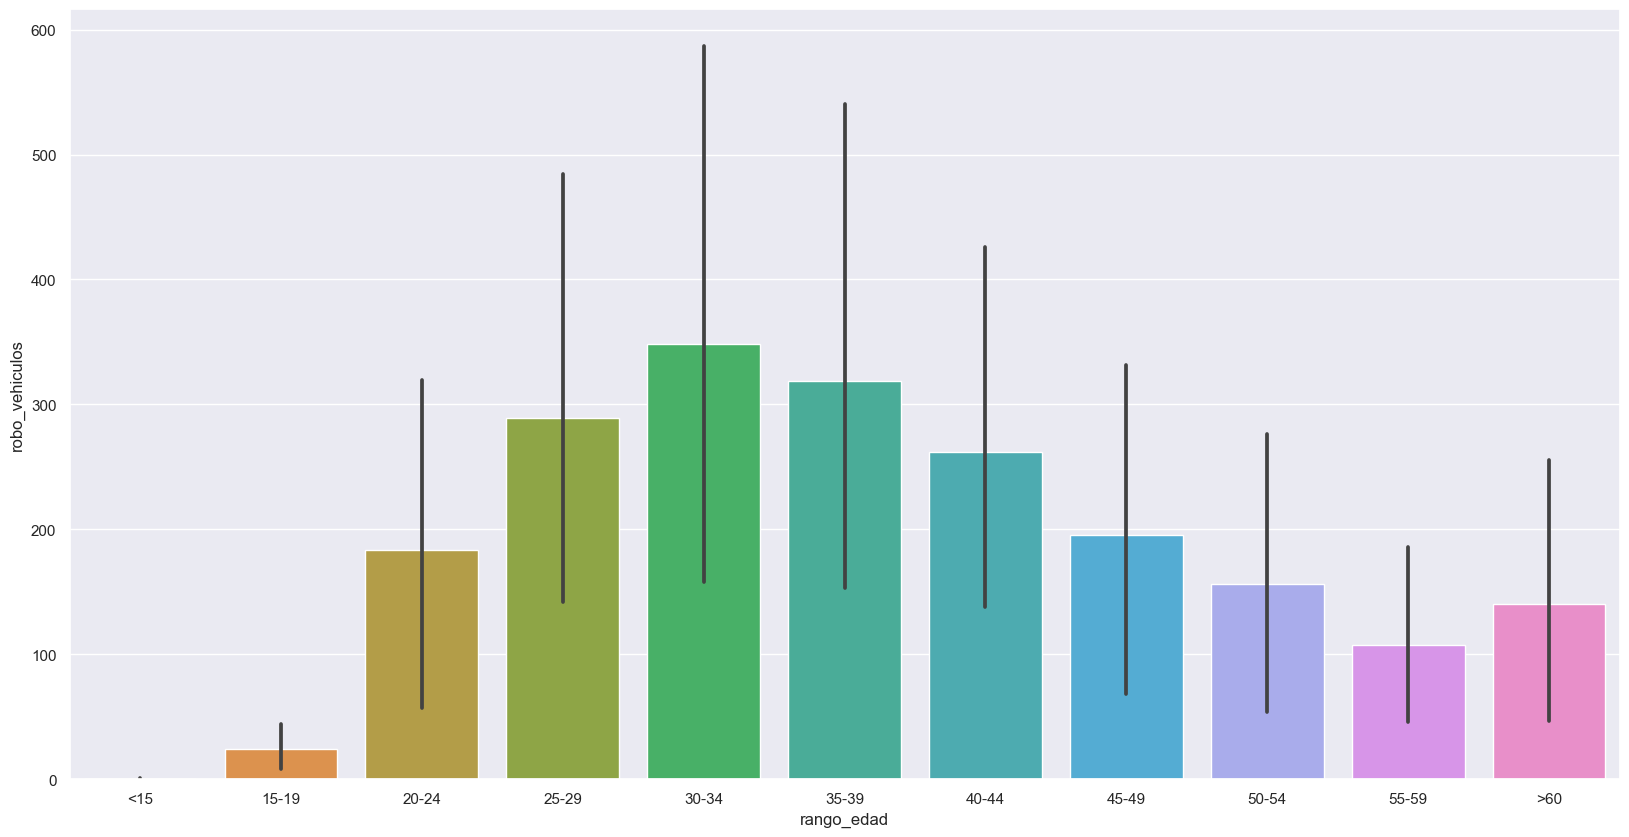

In [354]:
sns.barplot(x='rango_edad', y='robo_vehiculos', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_motocicletas'>

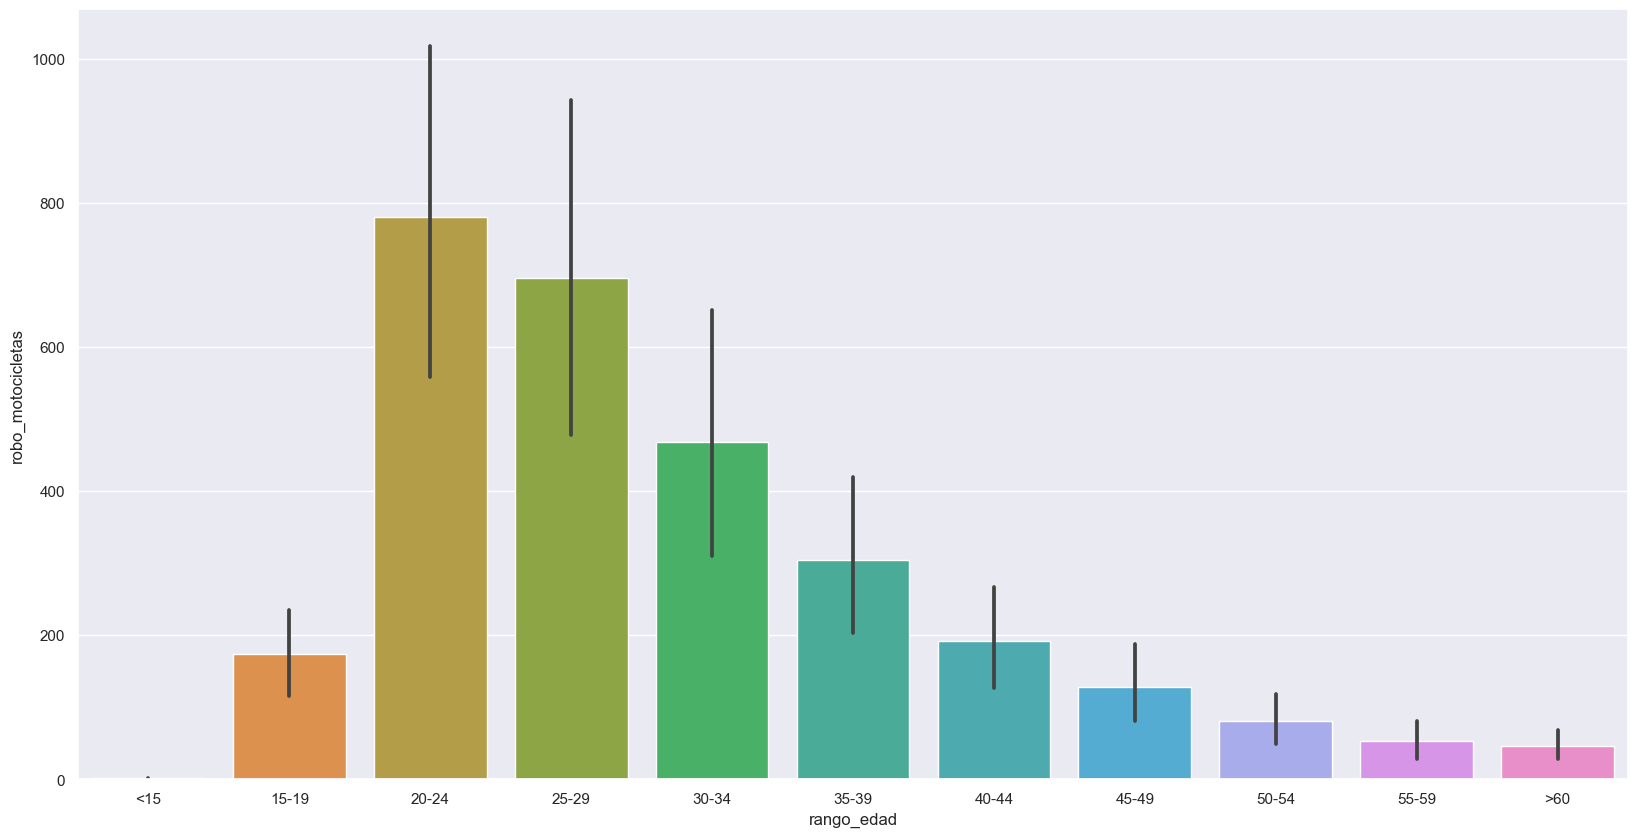

In [355]:
sns.barplot(x='rango_edad', y='robo_motocicletas', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_peatones'>

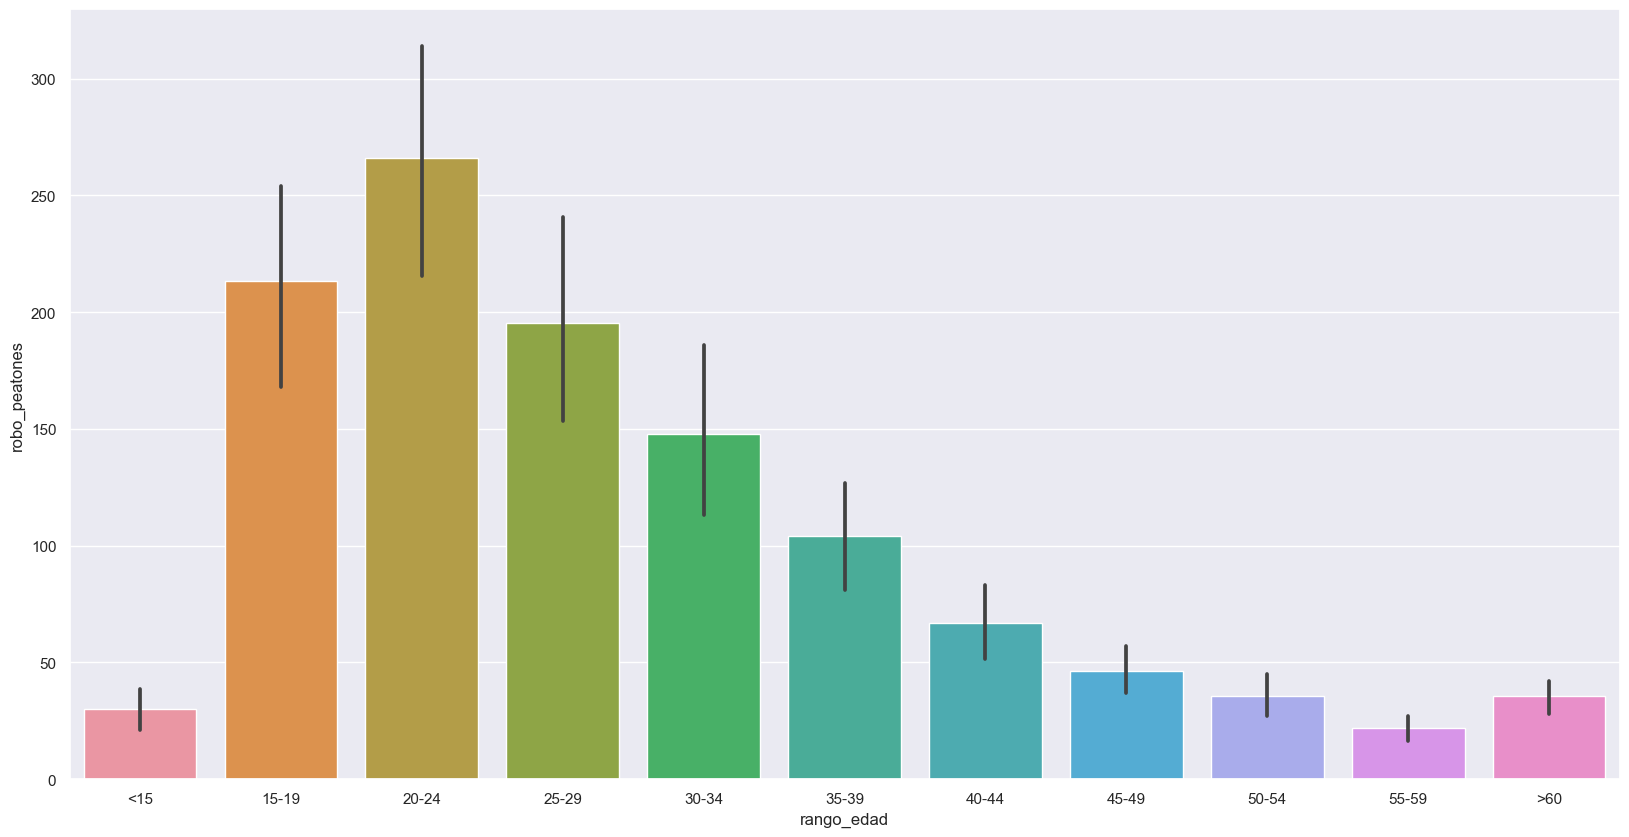

In [356]:
sns.barplot(x='rango_edad', y='robo_peatones', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_comercios'>

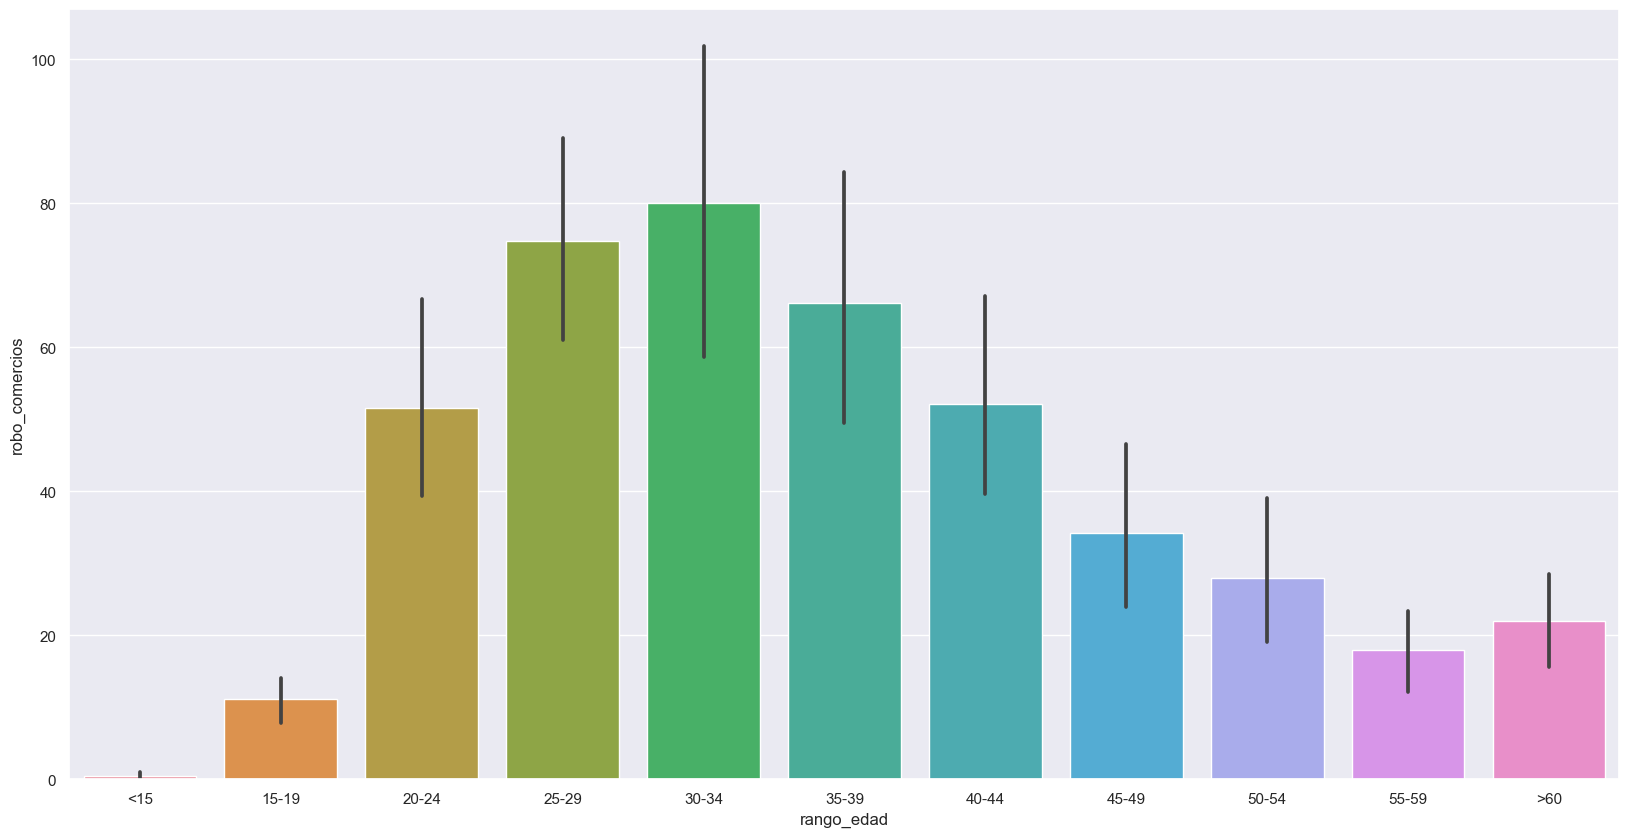

In [357]:
sns.barplot(x='rango_edad', y='robo_comercios', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_residencias'>

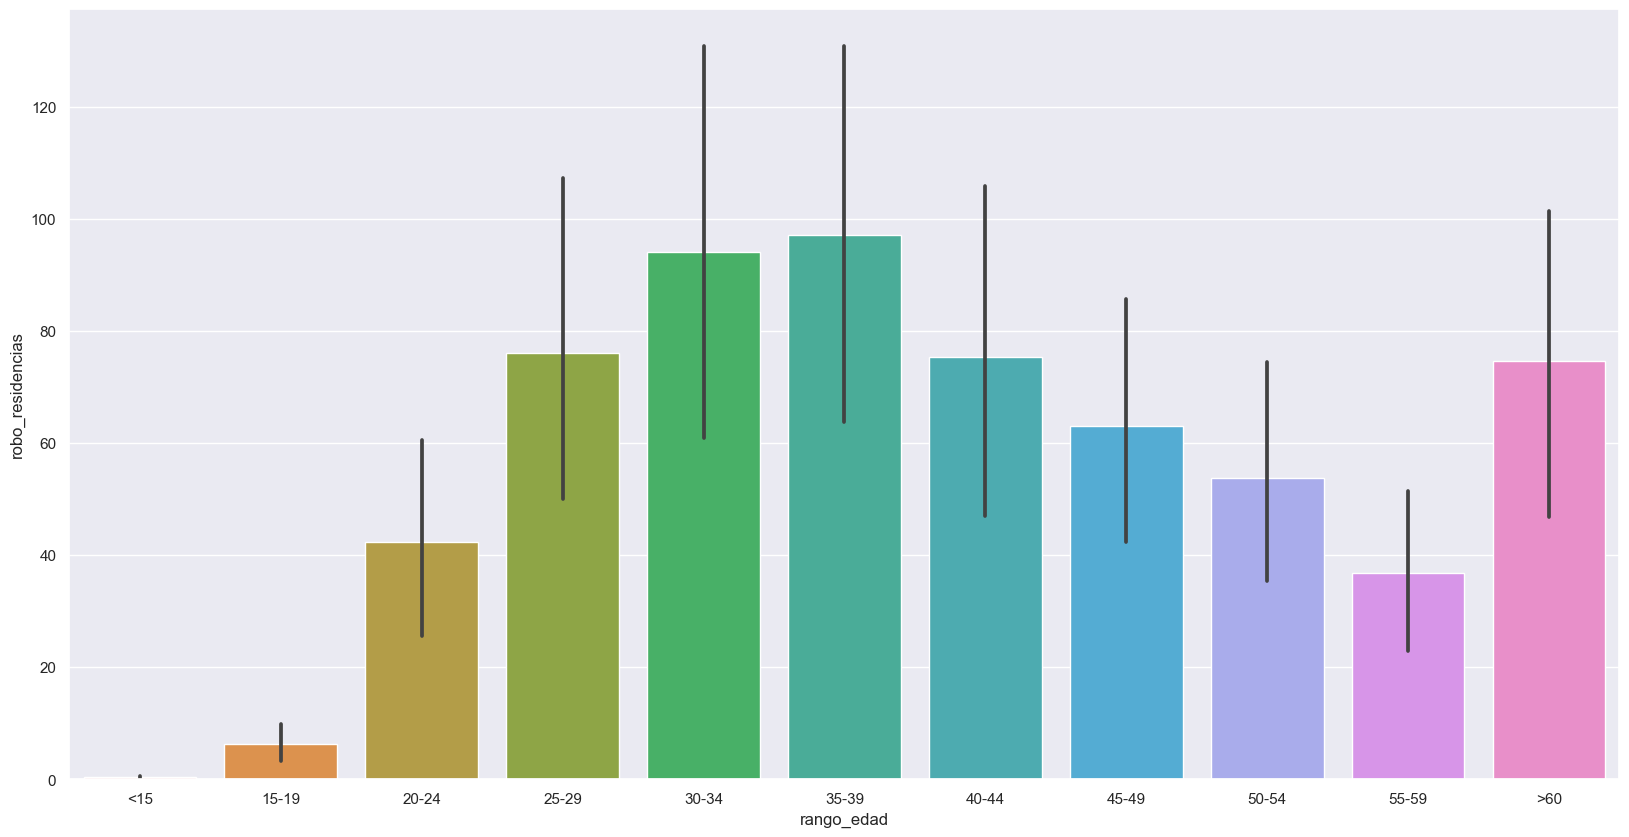

In [358]:
sns.barplot(x='rango_edad', y='robo_residencias', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_buses'>

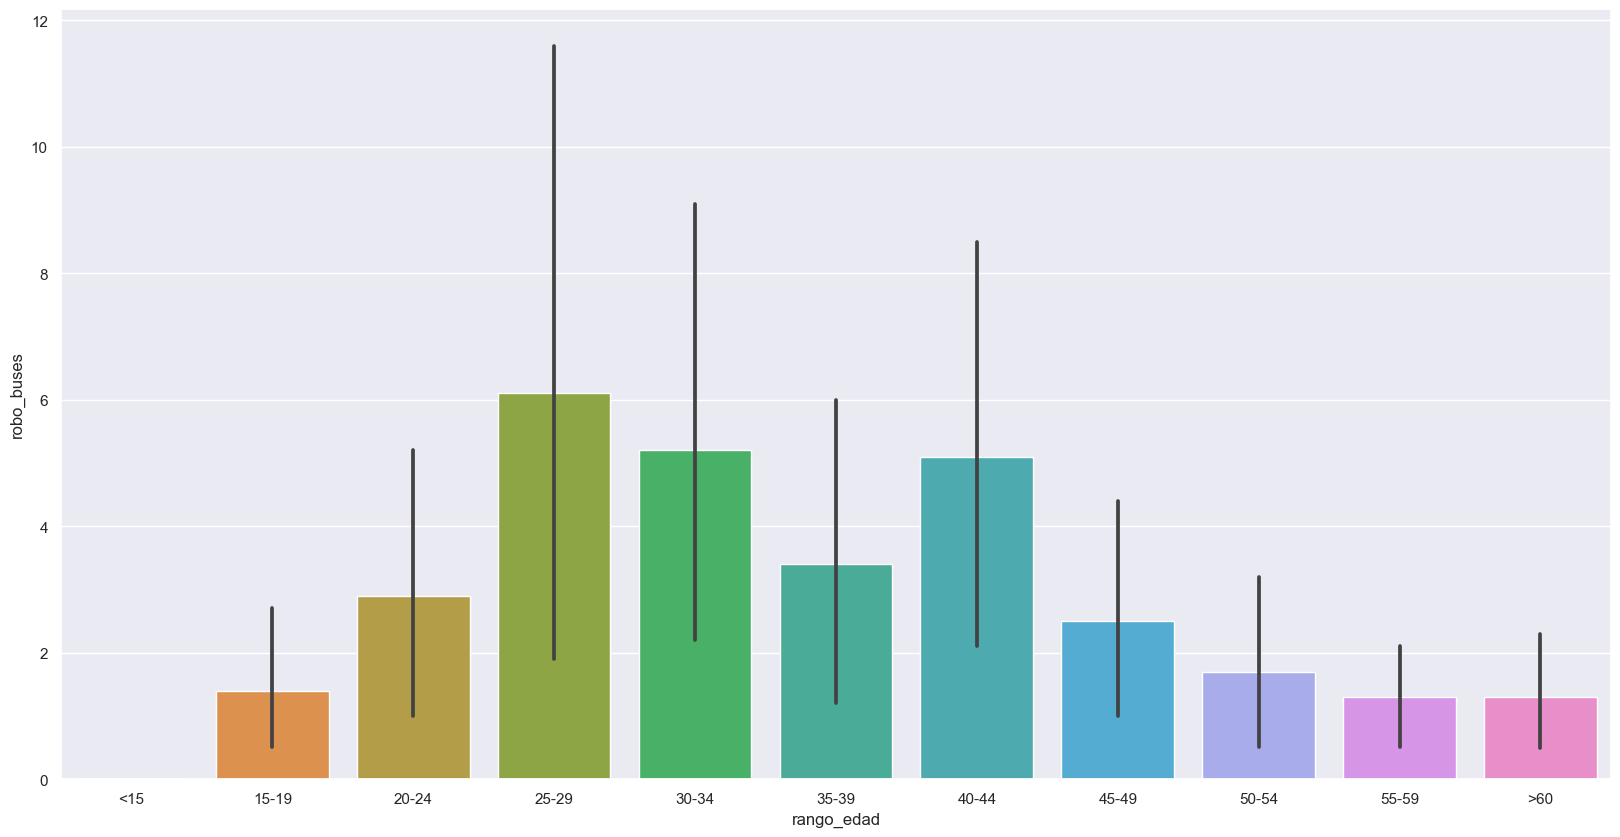

In [359]:
sns.barplot(x='rango_edad', y='robo_buses', data=datageneral)


### Analisis por clustering

#### Mapping 

In [360]:
mappedData = datageneral.copy()
mappedData["rango_edad"] = mappedData["rango_edad"].astype('category').cat.codes
mappedData.head()

,rango_edad,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses
0,9,1,0,0,33,1,0,0
1,0,83,277,30,279,16,17,6
2,1,624,1212,119,373,102,88,9
3,2,883,1042,234,308,152,103,27
4,3,1102,782,329,256,183,142,18


In [361]:
x = mappedData.iloc[:,:1]
x

,rango_edad
0,9
1,0
2,1
3,2
4,3
...,...
6,5
7,6
8,7
9,8


El codo de la grafica se encuentre en k =  3


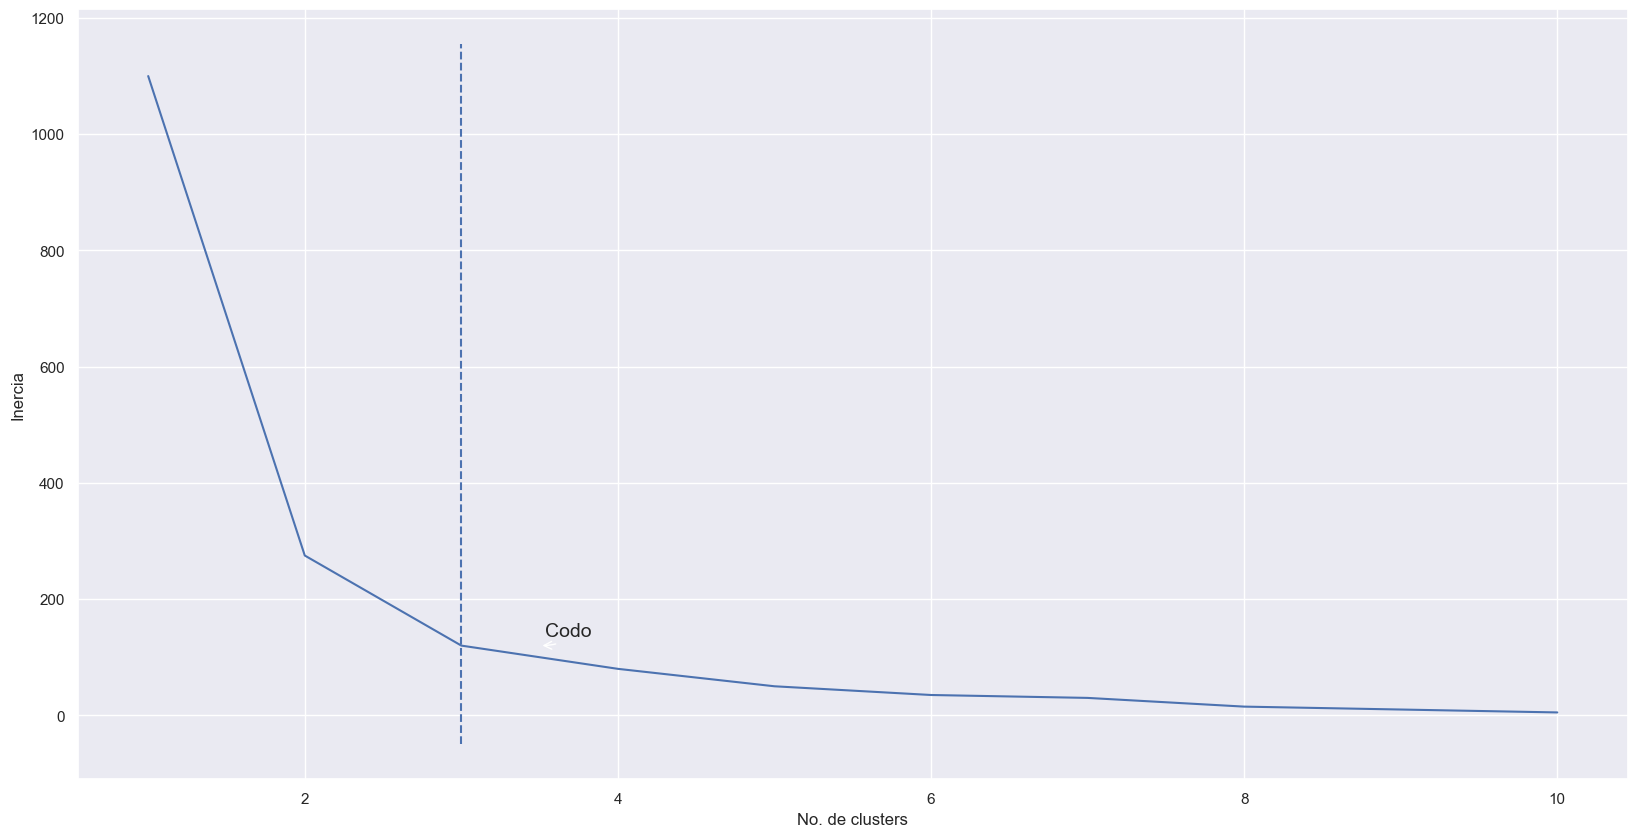

In [362]:
from kneed import KneeLocator

# Metodo del codo
inertia = []
for k in range(1,11): # De 1 a 10
    kmeans = KMeans(n_init = 'auto', n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_) 

# Calculo del codo
kl = KneeLocator(range(1,11), inertia, curve='convex', direction='decreasing')
print("El codo de la grafica se encuentre en k = ", kl.elbow)

# Grafico de inercia segun el numero de clusters con el codo
plt.plot(range(1,11), inertia)
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.annotate('Codo', xy=(kl.elbow+0.5, inertia[kl.elbow-1]), xytext=(4,7), textcoords='offset points', fontsize=14, arrowprops=dict(arrowstyle='->', connectionstyle='angle3'))
plt.show()



#### 3 Clusters

In [363]:
kmeans = KMeans(2)
kmeans.fit(x)

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [364]:
identifiedClusters = kmeans.fit_predict(x)
identifiedClusters

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [365]:
DataWithClusters = mappedData.copy()
DataWithClusters['Cluster'] = identifiedClusters
DataWithClusters

,rango_edad,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses,Cluster
0,9,1,0,0,33,1,0,0,1
1,0,83,277,30,279,16,17,6,0
2,1,624,1212,119,373,102,88,9,0
3,2,883,1042,234,308,152,103,27,0
4,3,1102,782,329,256,183,142,18,0
...,...,...,...,...,...,...,...,...,...
6,5,93,95,40,52,30,38,1,0
7,6,65,60,33,29,28,20,0,1
8,7,44,30,17,12,23,19,0,1
9,8,34,24,5,12,14,15,0,1


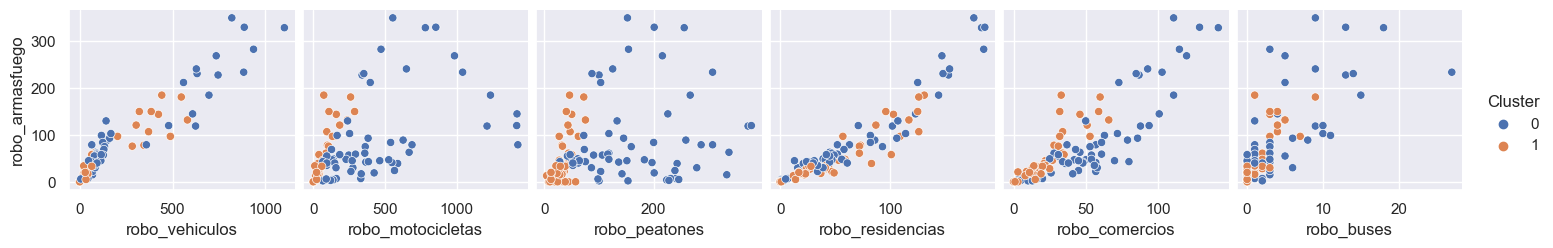

In [366]:
sns.pairplot(DataWithClusters, y_vars=["robo_armasfuego"], x_vars=["robo_vehiculos", "robo_motocicletas", "robo_peatones", "robo_residencias", "robo_comercios", "robo_buses"], hue="Cluster")
plt.show()

In [367]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(DataWithClusters)
score = silhouette_score(DataWithClusters, labels)
print("Silhouette score W/3 Clusters:", score)


Silhouette score W/3 Clusters: 0.4654020640197795


c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



#### 2 Clusters

In [368]:
kmeans = KMeans(2)
kmeans.fit(x)

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [369]:
identifiedClusters = kmeans.fit_predict(x)
identifiedClusters

c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [370]:
DataWithClusters = mappedData.copy()
DataWithClusters['Cluster'] = identifiedClusters
DataWithClusters

,rango_edad,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses,Cluster
0,9,1,0,0,33,1,0,0,0
1,0,83,277,30,279,16,17,6,1
2,1,624,1212,119,373,102,88,9,1
3,2,883,1042,234,308,152,103,27,1
4,3,1102,782,329,256,183,142,18,1
...,...,...,...,...,...,...,...,...,...
6,5,93,95,40,52,30,38,1,0
7,6,65,60,33,29,28,20,0,0
8,7,44,30,17,12,23,19,0,0
9,8,34,24,5,12,14,15,0,0


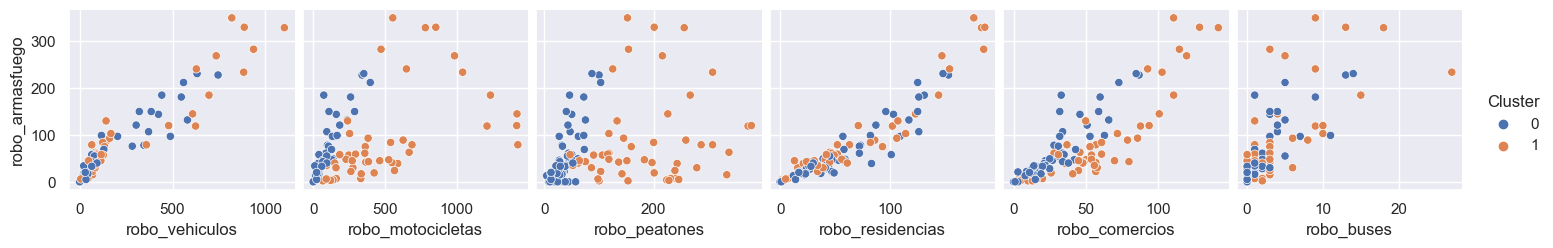

In [371]:
sns.pairplot(DataWithClusters, y_vars=["robo_armasfuego"], x_vars=["robo_vehiculos", "robo_motocicletas", "robo_peatones", "robo_residencias", "robo_comercios", "robo_buses"], hue="Cluster")
plt.show()

In [372]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(DataWithClusters)
score = silhouette_score(DataWithClusters, labels)
print("Silhouette score W/2 Clusters:", score)

Silhouette score W/2 Clusters: 0.6852621382392272


c:\Users\Jun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

